#Librerias

In [ ]:
pip install pandas_summary

In [ ]:
pip install isoweek

In [ ]:
pip install pyarrow

In [ ]:
import pandas as pd
from pandas_summary import DataFrameSummary

import numpy as np
import datetime
from isoweek import Week

from pandas_summary import DataFrameSummary
from sklearn.preprocessing import LabelEncoder, StandardScaler

import datetime

from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Embedding, Input, Flatten, Concatenate, Dense, BatchNormalization, Activation, LeakyReLU, Dropout
from tensorflow.keras.regularizers import l2
from tensorflow.keras import optimizers
from tensorflow.keras import backend as K
from tensorflow.keras.utils import to_categorical

from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession
config = ConfigProto()
config.gpu_options.allow_growth = True
session = InteractiveSession(config=config)

from sklearn.feature_selection import SelectKBest

#Montar Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#Data

In [ ]:
PATH = '/content/drive/MyDrive/Redes TPS/TP2/data/'
table_names = ['train', 'test', 'store', 'store_states', 'state_names', 'googletrend', 'weather']
train, test, store, store_states, state_names, googletrend, weather = dfs = [pd.read_csv(PATH + fname+'.csv', 
                                                                      low_memory=False) for fname in table_names]

## Train/Test

Las tablas "train" y "test" cuentan con los siguientes parametros:

* Store(int): Tienda identificada por un numero unico.
* DayOfWeek(int): Numero del dia de la semana. Es una variable categorica, cada uno representa un dia de la semana.
* Date(str): La fecha en la que se realizaron las compras indicadas "Sales". 
* Sales(int): Cantidad de compras realizadas en la fecha y tienda indicada.
* Customers(int): Cantidad de clientes en esa tienda para esa fecha.
* Open(int): es una variable dicotomica booleana que indica 0 si la tienda se encuentra cerrada para esa fecha y 1 si se encuentra abierta.
* Promo(int): es una variable dicotomica booleana que indica 0 si la tienda no tiene promo en esa fecha y 1 si sí la tiene.
* StateHoliday(str): es una variable categorica que puede tomar los siguientes valores: a(feriado publico), b(pascuas), c(navidad) o 0(no es feriado).
* SchoolHoliday(int): es una variable dicotomica booleana que indica 0 si no hay feriado escolar en esa fecha y 1 si sí lo hay. 

A traves del summary podemos ver que no hay datos faltantes en la tabla y que cuenta con 1017209 registros.




In [ ]:
headers_train = train.columns
print("Tipos de datos:")
for i in range(len(headers_train)):
  print(headers_train[i], type(train.iloc[0][headers_train[i]]))

Tipos de datos:
Store <class 'numpy.int64'>
DayOfWeek <class 'numpy.int64'>
Date <class 'str'>
Sales <class 'numpy.int64'>
Customers <class 'numpy.int64'>
Open <class 'numpy.int64'>
Promo <class 'numpy.int64'>
StateHoliday <class 'str'>
SchoolHoliday <class 'numpy.int64'>


In [ ]:
display(train.head())
display(DataFrameSummary(train).summary())

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
count,1.01721e+06,1.01721e+06,NaN,1.01721e+06,1.01721e+06,1.01721e+06,1.01721e+06,NaN,1.01721e+06
mean,558.43,3.99834,NaN,5773.82,633.146,0.830107,0.381515,NaN,0.178647
std,321.909,1.99739,NaN,3849.93,464.412,0.375539,0.485759,NaN,0.383056
min,1,1,NaN,0,0,0,0,NaN,0
25%,280,2,NaN,3727,405,1,0,NaN,0
50%,558,4,NaN,5744,609,1,0,NaN,0
75%,838,6,NaN,7856,837,1,1,NaN,0
max,1115,7,NaN,41551,7388,1,1,NaN,1
counts,1017209,1017209,1017209,1017209,1017209,1017209,1017209,1017209,1017209
uniques,1115,7,942,21734,4086,2,2,4,2


##Store

La tabla "store" cuenta con los siguientes parametros:


* Store(int): Tienda identificada por un numero unico. Esta variable se correlaciona con la variable "store" de las tablas "train" y "test".
* StoreType(str): Es una variable categorica que clasifica las tiendas en a, b, c o d.
* Assortment(str): Es una variable categorica que clasifica la variedad de las tiendas en a (basico), b (extra) o c (extendida).
* CompetitionDistance(float): Es la distancia en metros a la tienda del competidor más cercano.
* CompetitionOpenSinceMonth(float): Es el tiempo en meses desde que la tienda del competidor más cercano abrió.
* CompetitionOpenSinceYear(float): Es el tiempo en años desde que la tienda del competidor más cercano abrió.
* Promo2(int): Hace referencia si la tienda tiene una promo continua. Es una variable dicotomica booleana que indica 0 si la tienda no participa de este tipo de promoción y 1 si si lo hace.
* Promo2SinceWeek(float): Es el tiempo en semanas desde que la tienda participa de la promo2.
* Promo2SinceYear(float): Es el tiempo en años desde que la tienda participa de la promo2.
* **PromoInterval(float):** Indica el intervalo en donde se inicia la promo2. Por ejemplo: "Feb,May,Aug,Nov".

A traves del summary podemos ver que hay datos faltantes para ciertas variables y que cuenta con 1115 registros.



In [ ]:
headers_store = store.columns
print("Tipos de datos:")
for i in range(len(headers_store)):
  print(headers_store[i], type(store.iloc[0][headers_store[i]]))

Tipos de datos:
Store <class 'numpy.int64'>
StoreType <class 'str'>
Assortment <class 'str'>
CompetitionDistance <class 'numpy.float64'>
CompetitionOpenSinceMonth <class 'numpy.float64'>
CompetitionOpenSinceYear <class 'numpy.float64'>
Promo2 <class 'numpy.int64'>
Promo2SinceWeek <class 'numpy.float64'>
Promo2SinceYear <class 'numpy.float64'>
PromoInterval <class 'float'>


In [ ]:
display(store.head())
display(DataFrameSummary(store).summary())

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
count,1115,NaN,NaN,1112,761,761,1115,571,571,NaN
mean,558,NaN,NaN,5404.9,7.2247,2008.67,0.512108,23.5954,2011.76,NaN
std,322.017,NaN,NaN,7663.17,3.21235,6.19598,0.500078,14.142,1.67494,NaN
min,1,NaN,NaN,20,1,1900,0,1,2009,NaN
25%,279.5,NaN,NaN,717.5,4,2006,0,13,2011,NaN
50%,558,NaN,NaN,2325,8,2010,1,22,2012,NaN
75%,836.5,NaN,NaN,6882.5,10,2013,1,37,2013,NaN
max,1115,NaN,NaN,75860,12,2015,1,50,2015,NaN
counts,1115,1115,1115,1112,761,761,1115,571,571,571
uniques,1115,4,3,654,12,23,2,24,7,3


## Store States

La tabla "store_states" cuenta con los siguientes parametros:


* Store(int): Tienda identificada por un numero unico. Esta variable se correlaciona con la variable "store" de las tablas "train" y "test" y "store".
* State(str): Indica con 2 letras los estados de Alemania donde se encuentran las tiendas.


A traves del summary podemos ver que no hay datos faltantes para ciertas variables y que cuenta con 1115 registros.


In [ ]:
headers_store_states = store_states.columns
print("Tipos de datos:")
for i in range(len(headers_store_states)):
  print(headers_store_states[i], type(store_states.iloc[0][headers_store_states[i]]))

Tipos de datos:
Store <class 'numpy.int64'>
State <class 'str'>


In [ ]:
display(store_states.head())
display(DataFrameSummary(store_states).summary())

,Store,State
0,1,HE
1,2,TH
2,3,NW
3,4,BE
4,5,SN


,Store,State
count,1115,NaN
mean,558,NaN
std,322.017,NaN
min,1,NaN
25%,279.5,NaN
50%,558,NaN
75%,836.5,NaN
max,1115,NaN
counts,1115,1115
uniques,1115,12


## State Names

La tabla "state_names" cuenta con los siguientes parametros:


* StateName(str): Indica el nombre de los estados de Alemania donde se encuentran las tiendas.
* State(str): Indica con 2 letras los estados de Alemania donde se encuentran las tiendas. Esta variable se correlaciona con la variable "state" de la tabla "store_states".

A traves del summary podemos ver que no hay datos faltantes para ciertas variables y que cuenta con 16 registros.

In [ ]:
headers_state_names = state_names.columns
print("Tipos de datos:")
for i in range(len(headers_state_names)):
  print(headers_state_names[i], type(state_names.iloc[0][headers_state_names[i]]))

Tipos de datos:
StateName <class 'str'>
State <class 'str'>


In [ ]:
display(state_names)
display(DataFrameSummary(state_names).summary())

,StateName,State
0,BadenWuerttemberg,BW
1,Bayern,BY
2,Berlin,BE
3,Brandenburg,BB
4,Bremen,HB
5,Hamburg,HH
6,Hessen,HE
7,MecklenburgVorpommern,MV
8,Niedersachsen,"HB,NI"
9,NordrheinWestfalen,NW


,StateName,State
count,16,16
unique,16,16
top,Sachsen,MV
freq,1,1
counts,16,16
uniques,16,16
missing,0,0
missing_perc,0%,0%
types,unique,unique


## Google Trend

La tabla "googletrend" cuenta con los siguientes parametros:


* file(str): Identifica a las tiendas con el nombre "Rossmann_DE_" seguido de las dos letras que identifican el estado de Alemania donde se encuentra la tienda(variable "state" de "store_states").
* week(str): Indica las fecha de inicio y fin de la semana para la cual se mira el trend de busqueda de google de esa tienda.
* trend(int): Es el numero de busquedas en google de la tienda indicada.

A traves del summary podemos ver que no hay datos faltantes para ciertas variables y que cuenta con 2072 registros.

In [ ]:
headers_googletrend = googletrend.columns
print("Tipos de datos:")
for i in range(len(headers_googletrend)):
  print(headers_googletrend[i], type(googletrend.iloc[0][headers_googletrend[i]]))

Tipos de datos:
file <class 'str'>
week <class 'str'>
trend <class 'numpy.int64'>


In [ ]:
display(googletrend.head())
display(DataFrameSummary(googletrend).summary())

,file,week,trend
0,Rossmann_DE_SN,2012-12-02 - 2012-12-08,96
1,Rossmann_DE_SN,2012-12-09 - 2012-12-15,95
2,Rossmann_DE_SN,2012-12-16 - 2012-12-22,91
3,Rossmann_DE_SN,2012-12-23 - 2012-12-29,48
4,Rossmann_DE_SN,2012-12-30 - 2013-01-05,67


,file,week,trend
count,NaN,NaN,2072
mean,NaN,NaN,63.8142
std,NaN,NaN,12.6502
min,NaN,NaN,0
25%,NaN,NaN,55
50%,NaN,NaN,64
75%,NaN,NaN,72
max,NaN,NaN,100
counts,2072,2072,2072
uniques,14,148,68


## Weather

La tabla "weather" cuenta con los siguientes parametros:


* file(str):  Indica el nombre de los estados de Alemania donde se encuentran las tiendas. Esta se correlaciona con la variable "StateNames" de la tabla "state_names".
* Date(str): Indica la fecha de para la cual se mide el clima.
* Max_TemperatureC(int): Indica la máxima temperatura en grados Celsius para la fecha y el estado dado.
* Mean_TemperatureC(int): Indica la media de la temperatura en grados Celsius para la fecha y el estado dado.
* Min_TemperatureC(int): Indica la mínima temperatura en grados Celsius para la fecha y el estado dado.
* Dew_PointC(int): Indica el punto de rocío en grados Celsius para la fecha y el estado dado.
* MeanDew_PointC(int): Indica el promedio del punto de rocío en grados Celsius para la fecha y el estado dado.
* Min_DewpointC(int): Indica el mínimo punto de rocío en grados Celsius para la fecha y el estado dado.
* Max_Humidity(int): Indica la humedad máxima para la fecha y el estado dado.
* Mean_Humidity(int): Indica la humedad promedio para la fecha y el estado dado.
* Min_Humidity(int): Indica la humedad mínima para la fecha y el estado dado.
* Max_Sea_Level_PressurehPa(int): Indica la máxima presion a nivel del mar en hectopascales para la fecha y el estado dado.
* Mean_Sea_Level_PressurehPa(int): Indica el promedio de la presion a nivel del mar en hectopascales para la fecha y el estado dado.
* Min_Sea_Level_PressurehPa(int): Indica la mínima presion a nivel del mar en hectopascales para la fecha y el estado dado.
* Max_VisibilityKm(float): Indica la máxima visibilidad en kilometros para la fecha y el estado dado.
* Mean_VisibilityKm(float): Indica la visibilidad promedio en kilometros para la fecha y el estado dado.
* Min_VisibilitykM(float): Indica la mínima visibilidad en kilometros para la fecha y el estado dado.
* Max_Wind_SpeedKm_h(int): Indica la máxima velocidad del viento en kilometros por hora para la fecha y el estado dado.
* Mean_Wind_SpeedKm_h(int): Indica la velocidad del viento promedio en kilometros por hora para la fecha y el estado dado.
* Max_Gust_SpeedKm_h(float): Indica la máxima velocidad de ráfaga del viento en kilometros por hora para la fecha y el estado dado.
* Precipitationmm(float): Indica la precipitación en milimetros para la fecha y el estado dado.
* CloudCover(float): Indica la nubosidad para la fecha y el estado dado.
* **Events(str):** Indica 
* WindDirDegrees(int): Indica la dirección del viento en grados para la fecha y el estado dado.

A traves del summary podemos ver que hay datos faltantes para ciertas variables y que cuenta con 15840 registros.

In [ ]:
headers_weather = weather.columns
print("Tipos de datos:")
for i in range(len(headers_weather)):
  print(headers_weather[i], type(weather.iloc[0][headers_weather[i]]))

Tipos de datos:
file <class 'str'>
Date <class 'str'>
Max_TemperatureC <class 'numpy.int64'>
Mean_TemperatureC <class 'numpy.int64'>
Min_TemperatureC <class 'numpy.int64'>
Dew_PointC <class 'numpy.int64'>
MeanDew_PointC <class 'numpy.int64'>
Min_DewpointC <class 'numpy.int64'>
Max_Humidity <class 'numpy.int64'>
Mean_Humidity <class 'numpy.int64'>
Min_Humidity <class 'numpy.int64'>
Max_Sea_Level_PressurehPa <class 'numpy.int64'>
Mean_Sea_Level_PressurehPa <class 'numpy.int64'>
Min_Sea_Level_PressurehPa <class 'numpy.int64'>
Max_VisibilityKm <class 'numpy.float64'>
Mean_VisibilityKm <class 'numpy.float64'>
Min_VisibilitykM <class 'numpy.float64'>
Max_Wind_SpeedKm_h <class 'numpy.int64'>
Mean_Wind_SpeedKm_h <class 'numpy.int64'>
Max_Gust_SpeedKm_h <class 'numpy.float64'>
Precipitationmm <class 'numpy.float64'>
CloudCover <class 'numpy.float64'>
Events <class 'str'>
WindDirDegrees <class 'numpy.int64'>


In [ ]:
display(weather.head())
display(DataFrameSummary(weather).summary())

,file,Date,Max_TemperatureC,Mean_TemperatureC,Min_TemperatureC,Dew_PointC,MeanDew_PointC,Min_DewpointC,Max_Humidity,Mean_Humidity,Min_Humidity,Max_Sea_Level_PressurehPa,Mean_Sea_Level_PressurehPa,Min_Sea_Level_PressurehPa,Max_VisibilityKm,Mean_VisibilityKm,Min_VisibilitykM,Max_Wind_SpeedKm_h,Mean_Wind_SpeedKm_h,Max_Gust_SpeedKm_h,Precipitationmm,CloudCover,Events,WindDirDegrees
0,NordrheinWestfalen,2013-01-01,8,4,2,7,5,1,94,87,65,1013,1005,1001,31.0,12.0,4.0,39,26,58.0,5.08,6.0,Rain,215
1,NordrheinWestfalen,2013-01-02,7,4,1,5,3,2,93,85,78,1028,1022,1014,31.0,14.0,10.0,24,16,NaN,0.00,6.0,Rain,225
2,NordrheinWestfalen,2013-01-03,11,8,6,10,8,4,100,93,77,1035,1030,1026,31.0,8.0,2.0,26,21,NaN,1.02,7.0,Rain,240
3,NordrheinWestfalen,2013-01-04,9,9,8,9,9,8,100,94,87,1036,1035,1034,11.0,5.0,2.0,23,14,NaN,0.25,7.0,Rain,263
4,NordrheinWestfalen,2013-01-05,8,8,7,8,7,6,100,94,87,1035,1034,1033,10.0,6.0,3.0,16,10,NaN,0.00,7.0,Rain,268


,file,Date,Max_TemperatureC,Mean_TemperatureC,Min_TemperatureC,Dew_PointC,MeanDew_PointC,Min_DewpointC,Max_Humidity,Mean_Humidity,Min_Humidity,Max_Sea_Level_PressurehPa,Mean_Sea_Level_PressurehPa,Min_Sea_Level_PressurehPa,Max_VisibilityKm,Mean_VisibilityKm,Min_VisibilitykM,Max_Wind_SpeedKm_h,Mean_Wind_SpeedKm_h,Max_Gust_SpeedKm_h,Precipitationmm,CloudCover,Events,WindDirDegrees
count,NaN,NaN,15840,15840,15840,15840,15840,15840,15840,15840,15840,15840,15840,15840,15459,15459,15459,15840,15840,3604,15840,14667,NaN,15840
mean,NaN,NaN,14.6441,10.389,6.19899,8.58782,6.20581,3.62614,93.6596,74.2829,50.1586,1018.53,1015.3,1012.31,24.0576,12.2398,7.02516,22.7666,11.9722,48.8643,0.831718,5.55131,NaN,175.897
std,NaN,NaN,8.64601,7.37926,6.52639,6.24478,6.08677,6.12839,7.67853,13.4866,19.9602,7.78872,8.12331,8.60058,8.9768,5.06794,4.9806,8.98862,5.87284,13.027,2.51351,1.68771,NaN,101.589
min,NaN,NaN,-11,-13,-15,-14,-15,-73,44,30,4,976,974,970,0,0,0,3,2,21,0,0,NaN,-1
25%,NaN,NaN,8,4,1,4,2,-1,90.75,65,34,1014,1010,1007,14,10,3,16,8,39,0,5,NaN,80
50%,NaN,NaN,15,11,7,9,7,4,94,76,49,1019,1016,1013,31,11,7,21,11,48,0,6,NaN,202
75%,NaN,NaN,21,16,11,13,11,8,100,85,66,1024,1021,1018,31,14,10,27,14,55,0.25,7,NaN,256
max,NaN,NaN,39,31,24,25,20,19,100,100,100,1043,1040,1038,31,31,31,101,53,111,58.93,8,NaN,360
counts,15840,15840,15840,15840,15840,15840,15840,15840,15840,15840,15840,15840,15840,15840,15459,15459,15459,15840,15840,3604,15840,14667,11889,15840
uniques,16,990,51,45,40,40,36,40,53,71,93,67,67,69,24,32,24,44,29,47,41,9,21,362


#Preprocesamiento

## Datos faltantes

In [ ]:
def get_missing_columns(df):
    return list(df.columns[df.describe(include = 'all').loc['count']<len(df)])

In [ ]:
#nos fijamos para todas las tablas para que variables hay datos faltantes
for i, df in enumerate(dfs):
    print(table_names[i], get_missing_columns(df))

train []
test ['Open']
store ['CompetitionDistance', 'CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear', 'Promo2SinceWeek', 'Promo2SinceYear', 'PromoInterval']
store_states []
state_names []
googletrend []
weather ['Max_VisibilityKm', 'Mean_VisibilityKm', 'Min_VisibilitykM', 'Max_Gust_SpeedKm_h', 'CloudCover', 'Events']


### Test - 'Open'

In [ ]:
#vemos para que tienda y para que dia test tiene datos NaN en la variable "Open"
print("Las tiendas con datos NaN son:",np.unique(test.loc[test['Open'].isnull(),'Store'].tolist()))
print("Los dias de la semana con datos NaN son:",np.unique(test.loc[test['Open'].isnull(),'Store'].tolist()))

Las tiendas con datos NaN son: [622]
Los dias de la semana con datos NaN son: [622]


In [ ]:
#vemos los datos para la tienda de id 622, ques es la unica que presenta datos faltantes
test[test['Store'] == 622]

,Id,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday
479,480,622,4,2015-09-17,NaN,1,0,0
1335,1336,622,3,2015-09-16,NaN,1,0,0
2191,2192,622,2,2015-09-15,NaN,1,0,0
3047,3048,622,1,2015-09-14,NaN,1,0,0
3903,3904,622,7,2015-09-13,0.0,0,0,0
4759,4760,622,6,2015-09-12,NaN,0,0,0
5615,5616,622,5,2015-09-11,NaN,0,0,0
6471,6472,622,4,2015-09-10,NaN,0,0,0
7327,7328,622,3,2015-09-09,NaN,0,0,0
8183,8184,622,2,2015-09-08,NaN,0,0,0


In [ ]:
#vemos que la tienda 622 se encuentra por lo general abierta los dias 1,2,3,4,5,6 y cerrada los dias 7
test.loc[test['Open'].isna(), 'Open'] = (test[test['Open'].isna()]['DayOfWeek'] != 7)*1.0

### Store

#### 'CompetitionDistance'

In [ ]:
#consideramos que si la distancia es NaN es que no tengo tienda competidora cercana
#cambiamos todos los NaN por la distancia maxima de la tabla
store.loc[store['CompetitionDistance'].isna(), 'CompetitionDistance'] = store['CompetitionDistance'].max()

####'CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear'

In [ ]:
#pongo todas las fechas que estan en NaN en el mes 1 del año 1990
#si las fechas son mas antiguas que 1990 tambien las pongo en el mes 1 de 1990
store.loc[store['CompetitionOpenSinceYear'].isna() | (store['CompetitionOpenSinceYear']<1990), 'CompetitionOpenSinceYear'] = np.int32(1990)
store.loc[store['CompetitionOpenSinceMonth'].isna() | (store['CompetitionOpenSinceYear']<1990), 'CompetitionOpenSinceMonth'] = np.int32(1)

In [ ]:
store.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


####'Promo2SinceWeek', 'Promo2SinceYear', 'PromoInterval'

In [ ]:
print("Veo si la Promo2 esta vigente para los casos NaN:")
print("Promo2SinceWeek",np.unique(store.loc[store['Promo2SinceWeek'].isnull(),'Promo2'].tolist()))
print("Promo2SinceYear",np.unique(store.loc[store['Promo2SinceYear'].isnull(),'Promo2'].tolist()))
print("PromoInterval",np.unique(store.loc[store['PromoInterval'].isnull(),'Promo2'].tolist()))

Veo si la Promo2 esta vigente para los casos NaN:
Promo2SinceWeek [0]
Promo2SinceYear [0]
PromoInterval [0]


In [ ]:
#al ser todos para cuando la promo2 no esta vigente, veo como se tratan esas variables
print("Cantidad de valores no NaN de las variables para Promo2 no vigente =",store.loc[store['Promo2']==0,['Promo2SinceWeek', 'Promo2SinceYear', 'PromoInterval']].notnull().sum().sum())

Cantidad de valores no NaN de las variables para Promo2 no vigente = 0


In [ ]:
#como no hay un caso de promo2=0 con variables no NaN definimos nostras
#empieza en la fecha cero, mes 1 año 1990 y el intervalo es '-'
#(esto será tratado como categórica por eso tiene sentido()
store.loc[store['Promo2SinceWeek'].isna() & (store['Promo2'] == 0), 'Promo2SinceWeek'] = np.int32(1)
store.loc[store['Promo2SinceYear'].isna() & (store['Promo2'] == 0), 'Promo2SinceYear'] = np.int32(1990)
store.loc[store['PromoInterval'].isna() & (store['Promo2'] == 0), 'PromoInterval'] = '-'

### Weather - 'Max_VisibilityKm', 'Mean_VisibilityKm', 'Min_VisibilitykM', 'Max_Gust_SpeedKm_h', 'CloudCover', 'Events'

In [ ]:
#suponemos que son dias tranquilos 
#(de todas formas no se usaran para la predicción)
weather.loc[weather['Max_VisibilityKm'].isna(), 'Max_VisibilityKm'] = weather['Max_VisibilityKm'].max()
weather.loc[weather['Mean_VisibilityKm'].isna(), 'Mean_VisibilityKm'] = weather['Mean_VisibilityKm'].max()
weather.loc[weather['Min_VisibilitykM'].isna(), 'Min_VisibilitykM'] = weather['Min_VisibilitykM'].max()
weather.loc[weather['Max_Gust_SpeedKm_h'].isna(), 'Max_Gust_SpeedKm_h'] = weather['Max_Gust_SpeedKm_h'].min()
weather.loc[weather['CloudCover'].isna(), 'CloudCover'] = weather['CloudCover'].min()
weather.loc[weather['Events'].isna(), 'Events'] = 'Sunny'

## Acomodamos googletrend y creamos 'trend_de'

In [ ]:
#vemos la tabla
googletrend.head()

,file,week,trend
0,Rossmann_DE_SN,2012-12-02 - 2012-12-08,96
1,Rossmann_DE_SN,2012-12-09 - 2012-12-15,95
2,Rossmann_DE_SN,2012-12-16 - 2012-12-22,91
3,Rossmann_DE_SN,2012-12-23 - 2012-12-29,48
4,Rossmann_DE_SN,2012-12-30 - 2013-01-05,67


In [ ]:
#armamos una columna 'Date' con la primera fecha de 'week'
googletrend['Date'] = googletrend.week.str.split(' - ', expand=True)[0]

In [ ]:
#armamos una columna 'State' con el nombre del estado que sacamos de las ultimas dos letras de 'file'
googletrend['State'] = googletrend.file.str.split('_', expand=True)[2]

In [ ]:
#vemos que estados quedaron en la tabla
pd.unique(googletrend['State'])

array(['SN', None, 'BY', 'TH', 'NW', 'BE', 'RP', 'BW', 'NI', 'SH', 'HE',
       'ST', 'HH', 'SL'], dtype=object)

In [ ]:
#comparamos con la tabla de 'state_names' para ver que sean iguales y despues poder hacer el join
pd.unique(state_names['State'])

array(['BW', 'BY', 'BE', 'BB', 'HB', 'HH', 'HE', 'MV', 'HB,NI', 'NW',
       'RP', 'SL', 'SN', 'ST', 'SH', 'TH'], dtype=object)

In [ ]:
#vemos que 'NI' en 'googletrend' es 'HB,NI' por lo que lo cambiamos a eso
googletrend.loc[googletrend.State=='NI', "State"] = 'HB,NI'

In [ ]:
#vemos un valor 'None' en los estados, por lo que los vamos a ver en la tabla
googletrend.loc[googletrend['State'].isnull(),googletrend.columns]

,file,week,trend,Date,State
148,Rossmann_DE,2012-12-02 - 2012-12-08,77,2012-12-02,None
149,Rossmann_DE,2012-12-09 - 2012-12-15,76,2012-12-09,None
150,Rossmann_DE,2012-12-16 - 2012-12-22,85,2012-12-16,None
151,Rossmann_DE,2012-12-23 - 2012-12-29,59,2012-12-23,None
152,Rossmann_DE,2012-12-30 - 2013-01-05,61,2012-12-30,None
...,...,...,...,...,...
291,Rossmann_DE,2015-08-30 - 2015-09-05,78,2015-08-30,None
292,Rossmann_DE,2015-09-06 - 2015-09-12,71,2015-09-06,None
293,Rossmann_DE,2015-09-13 - 2015-09-19,77,2015-09-13,None
294,Rossmann_DE,2015-09-20 - 2015-09-26,67,2015-09-20,None


In [ ]:
#creamos una tabla donde ponemos estos valores con 'State' 'None' que son las tendencias generales de Alemania
trend_de = googletrend[googletrend.file == 'Rossmann_DE']

## Fechas

### Creamos fechas 'CompetitionOpenSince', 'Promo2Since' en 'store'

In [ ]:
#pasamos los meses y años que estan en float a int
store['CompetitionOpenSinceYear'] = store['CompetitionOpenSinceYear'].astype(np.int32)
store['CompetitionOpenSinceMonth'] = store['CompetitionOpenSinceMonth'].astype(np.int32)
store['Promo2SinceWeek'] = store['Promo2SinceWeek'].astype(np.int32)
store['Promo2SinceYear'] = store['Promo2SinceYear'].astype(np.int32)

In [ ]:
#creamos la fecha 'CompetitionOpenSince' con el año y mes dados suponiendo que el dia es 15
store['CompetitionOpenSince'] = pd.to_datetime(store.apply(lambda x: datetime.datetime(
    x.CompetitionOpenSinceYear, x.CompetitionOpenSinceMonth, 15), axis=1))

In [ ]:
#creamos la fecha 'Promo2Since' con el año y semana dados suponiendo que el dia es lunes
store["Promo2Since"] = pd.to_datetime(store.apply(lambda x: Week(
    x.Promo2SinceYear, x.Promo2SinceWeek).monday(), axis=1))

### Separamos fechas para 'weather', 'googletrend', 'trend_de', 'train' y 'test'

In [ ]:
#definimos una funcion que nos genera 'Year', 'Month', 'Week' y 'Day'
def add_datepart(df):
  df.Date = pd.to_datetime(df.Date)
  df["Year"] = df.Date.dt.year
  df["Month"] = df.Date.dt.month
  df["Week"] = df.Date.dt.week
  df["Day"] = df.Date.dt.day

In [ ]:
#lo aplicamos para 'weather', 'googletrend', 'trend_de', 'train' y 'test'
add_datepart(weather)
add_datepart(googletrend)
add_datepart(trend_de)
add_datepart(train)
add_datepart(test)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  
/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:5170: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-package

## Unimos las tablas

In [ ]:
#creamos una funcion para unir las tablas
def join_df(left, right, left_on, right_on=None):
    if right_on is None: right_on = left_on
    return left.merge(right, how='left', left_on=left_on, right_on=right_on, 
                      suffixes=("", "_y"))

### 'weather' y 'states_names'

In [ ]:
#unimos weather y state_names con las variables 'file' de la primera y 'StateNames' en la segunda 
#ambas tienen los nombres completos de los estados de la tienda
weather = join_df(weather, state_names, "file", "StateName")

In [ ]:
#vemos como a lo ultimo se agregan las dos variables de 'StateName' y 'State' de 'weather'
weather.columns

Index(['file', 'Date', 'Max_TemperatureC', 'Mean_TemperatureC',
       'Min_TemperatureC', 'Dew_PointC', 'MeanDew_PointC', 'Min_DewpointC',
       'Max_Humidity', 'Mean_Humidity', 'Min_Humidity',
       'Max_Sea_Level_PressurehPa', 'Mean_Sea_Level_PressurehPa',
       'Min_Sea_Level_PressurehPa', 'Max_VisibilityKm', 'Mean_VisibilityKm',
       'Min_VisibilitykM', 'Max_Wind_SpeedKm_h', 'Mean_Wind_SpeedKm_h',
       'Max_Gust_SpeedKm_h', 'Precipitationmm', 'CloudCover', 'Events',
       'WindDirDegrees', 'Year', 'Month', 'Week', 'Day', 'StateName', 'State'],
      dtype='object')

### 'store' y 'store_states'

In [ ]:
#agregamos la variable 'State' de 'store_states' a 'store' (se unen por variable 'Store' que son IDs)
store = join_df(store, store_states, "Store")

In [ ]:
#chequeamos que no haya valores nulos
print("Cantidad de valores nulos de 'State' en 'store'=",len(store[store.State.isnull()]))

Cantidad de valores nulos de 'State' en 'store'= 0


In [ ]:
#vemos que se agrega la variable 'State' en 'store'
store.columns

Index(['Store', 'StoreType', 'Assortment', 'CompetitionDistance',
       'CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear', 'Promo2',
       'Promo2SinceWeek', 'Promo2SinceYear', 'PromoInterval',
       'CompetitionOpenSince', 'Promo2Since', 'State'],
      dtype='object')

### 'joined_train' = 'train', 'store', 'googletrend', 'trend_de', 'weather'

In [ ]:
#creamos la tabla 'joined_train' donde juntamos las tablas 'train' y 'store' (se unen por variable 'Store' que son IDs)
joined_train = join_df(train, store, "Store")

In [ ]:
#unimos 'joined_train' con 'googletrend' (se unien por variable 'State', 'Year' y 'Week')
#esto deja afuera los 'State' 'None' en 'googletrend' (tabla 'trend_de')
joined_train = join_df(joined_train, googletrend, ["State","Year", "Week"])

In [ ]:
#unimos 'joined_train' con 'trend_de' se unien por variable 'Year' y 'Week')
joined_train = joined_train.merge(trend_de, 'left', ["Year", "Week"], suffixes=('', '_DE'))

In [ ]:
#unimos 'joined_train' con 'weather' se unien por variable 'State' y 'Date')
joined_train = join_df(joined_train, weather, ["State","Date"])

In [ ]:
#nos fijamos para en 'joined_train' si hay datos faltantes
print("Columnas de 'joined_train' con datos faltantes:", get_missing_columns(joined_train))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.

Columnas de 'joined_train' con datos faltantes: ['State_DE']


In [ ]:
#vemos que se agregan las columnas de 'store' a 'train'
joined_train.columns

Index(['Store', 'DayOfWeek', 'Date', 'Sales', 'Customers', 'Open', 'Promo',
       'StateHoliday', 'SchoolHoliday', 'Year', 'Month', 'Week', 'Day',
       'StoreType', 'Assortment', 'CompetitionDistance',
       'CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear', 'Promo2',
       'Promo2SinceWeek', 'Promo2SinceYear', 'PromoInterval',
       'CompetitionOpenSince', 'Promo2Since', 'State', 'file', 'week', 'trend',
       'Date_y', 'Month_y', 'Day_y', 'file_DE', 'week_DE', 'trend_DE',
       'Date_DE', 'State_DE', 'Month_DE', 'Day_DE', 'file_y',
       'Max_TemperatureC', 'Mean_TemperatureC', 'Min_TemperatureC',
       'Dew_PointC', 'MeanDew_PointC', 'Min_DewpointC', 'Max_Humidity',
       'Mean_Humidity', 'Min_Humidity', 'Max_Sea_Level_PressurehPa',
       'Mean_Sea_Level_PressurehPa', 'Min_Sea_Level_PressurehPa',
       'Max_VisibilityKm', 'Mean_VisibilityKm', 'Min_VisibilitykM',
       'Max_Wind_SpeedKm_h', 'Mean_Wind_SpeedKm_h', 'Max_Gust_SpeedKm_h',
       'Precipitationmm', 'Cl

### 'joined_test' = 'test', 'store', 'googletrend', 'trend_de', 'weather'

In [ ]:
#creamos la tabla 'joined_test' donde juntamos las tablas 'test' y 'store' (se unen por variable 'Store' que son IDs)
joined_test = join_df(test, store, "Store")

In [ ]:
#unimos 'joined_test' con 'googletrend' (se unien por variable 'State', 'Year' y 'Week')
#esto deja afuera los 'State' 'None' en 'googletrend' (tabla 'trend_de')
joined_test = join_df(joined_test, googletrend, ["State","Year", "Week"])

In [ ]:
#unimos 'joined_test' con 'trend_de' se unien por variable 'Year' y 'Week')
joined_test = joined_test.merge(trend_de, 'left', ["Year", "Week"], suffixes=('', '_DE'))

In [ ]:
#unimos 'joined_test' con 'weather' se unien por variable 'State' y 'Date')
joined_test = join_df(joined_test, weather, ["State","Date"])

In [ ]:
#nos fijamos para en 'joined_test' si hay datos faltantes
print("Columnas de 'joined_test' con datos faltantes:", get_missing_columns(joined_test))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.

Columnas de 'joined_test' con datos faltantes: ['State_DE']


In [ ]:
#vemos que se agregan las columnas de 'store' a 'test'
joined_test.columns

Index(['Id', 'Store', 'DayOfWeek', 'Date', 'Open', 'Promo', 'StateHoliday',
       'SchoolHoliday', 'Year', 'Month', 'Week', 'Day', 'StoreType',
       'Assortment', 'CompetitionDistance', 'CompetitionOpenSinceMonth',
       'CompetitionOpenSinceYear', 'Promo2', 'Promo2SinceWeek',
       'Promo2SinceYear', 'PromoInterval', 'CompetitionOpenSince',
       'Promo2Since', 'State', 'file', 'week', 'trend', 'Date_y', 'Month_y',
       'Day_y', 'file_DE', 'week_DE', 'trend_DE', 'Date_DE', 'State_DE',
       'Month_DE', 'Day_DE', 'file_y', 'Max_TemperatureC', 'Mean_TemperatureC',
       'Min_TemperatureC', 'Dew_PointC', 'MeanDew_PointC', 'Min_DewpointC',
       'Max_Humidity', 'Mean_Humidity', 'Min_Humidity',
       'Max_Sea_Level_PressurehPa', 'Mean_Sea_Level_PressurehPa',
       'Min_Sea_Level_PressurehPa', 'Max_VisibilityKm', 'Mean_VisibilityKm',
       'Min_VisibilitykM', 'Max_Wind_SpeedKm_h', 'Mean_Wind_SpeedKm_h',
       'Max_Gust_SpeedKm_h', 'Precipitationmm', 'CloudCover', 'Events',
  

## Creamos y y eliminamos variables

### 'CompetitionDaysOpen' y 'CompetitionMonthsOpen'

In [ ]:
#creamos variable 'CompetitionDaysOpen' a partir de 'CompetitionOpenSince'
joined_train["CompetitionDaysOpen"] = joined_train.Date.subtract(joined_train["CompetitionOpenSince"]).dt.days
joined_test["CompetitionDaysOpen"] = joined_test.Date.subtract(joined_test["CompetitionOpenSince"]).dt.days

In [ ]:
#vemos el valor minimo de la nueva columna y si hay valores negativos
print("Valor minimo de 'joined_train'=",joined_train['CompetitionDaysOpen'].min())
print("Cantidad de valores negativos de 'joined_train'=",len(joined_train.loc[joined_train['CompetitionDaysOpen']<0,'CompetitionDaysOpen']))
print("Valor minimo de 'joined_test'=",joined_test['CompetitionDaysOpen'].min())
print("Cantidad de valores negativos de 'joined_test'=",len(joined_test.loc[joined_test['CompetitionDaysOpen']<0,'CompetitionDaysOpen']))

Valor minimo de 'joined_train'= -956
Cantidad de valores negativos de 'joined_train'= 87200
Valor minimo de 'joined_test'= -14
Cantidad de valores negativos de 'joined_test'= 28


In [ ]:
#corregimos los valores negativos en dias
joined_train.loc[joined_train.CompetitionDaysOpen<0, "CompetitionDaysOpen"] = 0
joined_test.loc[joined_test.CompetitionDaysOpen<0, "CompetitionDaysOpen"] = 0

In [ ]:
#creamos 'CompetitionMonthsOpen' a partir de 'CompetitionDaysOpen'
joined_train["CompetitionMonthsOpen"] = joined_train["CompetitionDaysOpen"]//30
joined_test["CompetitionMonthsOpen"] = joined_test["CompetitionDaysOpen"]//30
#limitamos la variable 'CompetitionMonthsOpen' a como maximo 24 (2 años)
joined_train.loc[joined_train.CompetitionMonthsOpen>24, "CompetitionMonthsOpen"] = 24
joined_test.loc[joined_test.CompetitionMonthsOpen>24, "CompetitionMonthsOpen"] = 24

### 'Promo2Days' y 'Promo2Weeks'

In [ ]:
#creamos variable 'Promo2Days' a partir de 'Promo2Since'
joined_train["Promo2Days"] = joined_train.Date.subtract(joined_train["Promo2Since"]).dt.days
joined_test["Promo2Days"] = joined_test.Date.subtract(joined_test["Promo2Since"]).dt.days

In [ ]:
#vemos el valor minimo de la nueva columna y si hay valores negativos
print("Valor minimo de 'joined_train'=",joined_train['Promo2Days'].min())
print("Cantidad de valores negativos de 'joined_train'=",len(joined_train.loc[joined_train['Promo2Days']<0,'Promo2Days']))
print("Valor minimo de 'joined_test'=",joined_test['Promo2Days'].min())
print("Cantidad de valores negativos de 'joined_test'=",len(joined_test.loc[joined_test['Promo2Days']<0,'Promo2Days']))

Valor minimo de 'joined_train'= -881
Cantidad de valores negativos de 'joined_train'= 69630
Valor minimo de 'joined_test'= 61
Cantidad de valores negativos de 'joined_test'= 0


In [ ]:
#corregimos los valores negativos en dias
joined_train.loc[joined_train.Promo2Days<0, "Promo2Days"] = 0
joined_test.loc[joined_test.Promo2Days<0, "Promo2Days"] = 0

In [ ]:
#creamos 'Promo2Weeks' a partir de 'Promo2Days'
joined_train["Promo2Weeks"] = joined_train["Promo2Days"]//7
joined_test["Promo2Weeks"] = joined_test["Promo2Days"]//7
#limitamos la variable 'Promo2Weeks' a como maximo 25 
joined_train.loc[joined_train.Promo2Weeks>25, "Promo2Weeks"] = 25
joined_test.loc[joined_test.Promo2Weeks>25, "Promo2Weeks"] = 25

### Eliminamos duplicadas

In [ ]:
#vemos el tamaño de las tablas unidas
joined_train.shape, joined_test.shape

((1017209, 70), (41088, 69))

In [ ]:
#removemos las columnas de las tablas unidas duplicadas
joined_train = joined_train.loc[:,~joined_train.columns.duplicated()]
joined_test = joined_test.loc[:,~joined_test.columns.duplicated()]

In [ ]:
#vemos finalmente el tamaño de las tablas unidas
joined_train.shape, joined_test.shape

((1017209, 68), (41088, 67))

### No se para que es esto

In [ ]:
#%time joined_train.to_feather('joined_train_before_durations.fth')

In [ ]:
#%time joined_test.to_feather('joined_test_before_durations.fth')

In [ ]:
#set(joined_train.columns) - set(joined_test.columns)

In [ ]:
#print(list(weather.columns))

#03-Durations

## Paso StateHoliday a booleana

In [ ]:
joined_train['StateHoliday'].value_counts()

0    986159
a     20260
b      6690
c      4100
Name: StateHoliday, dtype: int64

a = public holiday, b = Easter holiday, c = Christmas, 0 = None

In [ ]:
joined_train['StateHoliday_bool'] = joined_train.StateHoliday!='0'
joined_test['StateHoliday_bool'] = joined_test.StateHoliday!='0'

## Durations

#### Agrega columnas con "antes" y "despues" de eventos

In [ ]:
columns = ["Date", "Store", "Promo", "StateHoliday_bool", "SchoolHoliday"]#eventos

In [ ]:
#quiero ver cuanto tiempo desde la ultima vez y cuanto tiempo hasta la proxima vez que pase cada evento
#aparece distinta la funcion en el video min 9 -> "get_elapsed"
class elapsed(object):
    def __init__(self, fld):
        self.fld = fld
        self.last = pd.to_datetime(np.nan)
        self.last_store = 0
        
    def get(self, row):
        if row.Store != self.last_store: #si no es la misma store se vuelve a empezar
            self.last = pd.to_datetime(np.nan)
            self.last_store = row.Store
        if (row[self.fld]): self.last = row.Date
        return row.Date-self.last

In [ ]:
#puestas para correr despues
df_train = joined_train[columns]
df_test = joined_test[columns]

In [ ]:
df_train.head()

,Date,Store,Promo,StateHoliday_bool,SchoolHoliday
0,2015-07-31,1,1,False,1
1,2015-07-31,2,1,False,1
2,2015-07-31,3,1,False,1
3,2015-07-31,4,1,False,1
4,2015-07-31,5,1,False,1


In [ ]:
df_test.head()

,Date,Store,Promo,StateHoliday_bool,SchoolHoliday
0,2015-09-17,1,1,False,0
1,2015-09-17,3,1,False,0
2,2015-09-17,7,1,False,0
3,2015-09-17,8,1,False,0
4,2015-09-17,9,1,False,0


In [ ]:
def add_elapsed(df, fld, prefix):
    sh_el = elapsed(fld)
    df[prefix+fld] = df.apply(sh_el.get, axis=1)

In [ ]:
fld = 'SchoolHoliday'
df_train = df_train.sort_values(['Store', 'Date'])
add_elapsed(df_train, fld, 'After')
df_train.head()

,Date,Store,Promo,StateHoliday_bool,SchoolHoliday,AfterSchoolHoliday
1016095,2013-01-01,1,0,True,1,0 days
1014980,2013-01-02,1,0,False,1,0 days
1013865,2013-01-03,1,0,False,1,0 days
1012750,2013-01-04,1,0,False,1,0 days
1011635,2013-01-05,1,0,False,1,0 days


In [ ]:
df_test = df_test.sort_values(['Store', 'Date'])
add_elapsed(df_test, fld, 'After')
df_test.head()

,Date,Store,Promo,StateHoliday_bool,SchoolHoliday,AfterSchoolHoliday
40232,2015-08-01,1,0,False,1,0 days
39376,2015-08-02,1,0,False,1,0 days
38520,2015-08-03,1,1,False,1,0 days
37664,2015-08-04,1,1,False,1,0 days
36808,2015-08-05,1,1,False,1,0 days


In [ ]:
df_train = df_train.sort_values(['Store', 'Date'], ascending=[True, False])
add_elapsed(df_train, fld, 'Before')
df_train.head()

,Date,Store,Promo,StateHoliday_bool,SchoolHoliday,AfterSchoolHoliday,BeforeSchoolHoliday
0,2015-07-31,1,1,False,1,0 days,0 days
1115,2015-07-30,1,1,False,1,0 days,0 days
2230,2015-07-29,1,1,False,1,0 days,0 days
3345,2015-07-28,1,1,False,1,0 days,0 days
4460,2015-07-27,1,1,False,1,0 days,0 days


In [ ]:
df_test = df_test.sort_values(['Store', 'Date'], ascending=[True, False])
add_elapsed(df_test, fld, 'Before')
df_test.head()

,Date,Store,Promo,StateHoliday_bool,SchoolHoliday,AfterSchoolHoliday,BeforeSchoolHoliday
0,2015-09-17,1,1,False,0,13 days,NaT
856,2015-09-16,1,1,False,0,12 days,NaT
1712,2015-09-15,1,1,False,0,11 days,NaT
2568,2015-09-14,1,1,False,0,10 days,NaT
3424,2015-09-13,1,0,False,0,9 days,NaT


In [ ]:
fld = 'StateHoliday_bool'
df_train = df_train.sort_values(['Store', 'Date'])
add_elapsed(df_train, fld, 'After')
df_train = df_train.sort_values(['Store', 'Date'], ascending=[True, False])
add_elapsed(df_train, fld, 'Before')

In [ ]:
fld = 'StateHoliday_bool'
df_test = df_test.sort_values(['Store', 'Date'])
add_elapsed(df_test, fld, 'After')
df_test = df_test.sort_values(['Store', 'Date'], ascending=[True, False])
add_elapsed(df_test, fld, 'Before')

In [ ]:
fld = 'Promo'
df_train = df_train.sort_values(['Store', 'Date'])
add_elapsed(df_train, fld, 'After')
df_train = df_train.sort_values(['Store', 'Date'], ascending=[True, False])
add_elapsed(df_train, fld, 'Before')

In [ ]:
fld = 'Promo'
df_test = df_test.sort_values(['Store', 'Date'])
add_elapsed(df_test, fld, 'After')
df_test = df_test.sort_values(['Store', 'Date'], ascending=[True, False])
add_elapsed(df_test, fld, 'Before')

In [ ]:
df_train.head(10)

,Date,Store,Promo,StateHoliday_bool,SchoolHoliday,AfterSchoolHoliday,BeforeSchoolHoliday,AfterStateHoliday_bool,BeforeStateHoliday_bool,AfterPromo,BeforePromo
0,2015-07-31,1,1,False,1,0 days,0 days,57 days,NaT,0 days,0 days
1115,2015-07-30,1,1,False,1,0 days,0 days,56 days,NaT,0 days,0 days
2230,2015-07-29,1,1,False,1,0 days,0 days,55 days,NaT,0 days,0 days
3345,2015-07-28,1,1,False,1,0 days,0 days,54 days,NaT,0 days,0 days
4460,2015-07-27,1,1,False,1,0 days,0 days,53 days,NaT,0 days,0 days
5575,2015-07-26,1,0,False,0,107 days,-1 days,52 days,NaT,9 days,-1 days
6690,2015-07-25,1,0,False,0,106 days,-2 days,51 days,NaT,8 days,-2 days
7805,2015-07-24,1,0,False,0,105 days,-3 days,50 days,NaT,7 days,-3 days
8920,2015-07-23,1,0,False,0,104 days,-4 days,49 days,NaT,6 days,-4 days
10035,2015-07-22,1,0,False,0,103 days,-5 days,48 days,NaT,5 days,-5 days


In [ ]:
df_train = df_train.set_index("Date")
df_test = df_test.set_index("Date")

In [ ]:
df_train.sort_values('Date').head(5)

,Store,Promo,StateHoliday_bool,SchoolHoliday,AfterSchoolHoliday,BeforeSchoolHoliday,AfterStateHoliday_bool,BeforeStateHoliday_bool,AfterPromo,BeforePromo
Date,,,,,,,,,,
2013-01-01,1115,0,True,1,0 days,0 days,0 days,0 days,NaT,-6 days
2013-01-01,746,0,True,1,0 days,0 days,0 days,0 days,NaT,-6 days
2013-01-01,171,0,True,1,0 days,0 days,0 days,0 days,NaT,-6 days
2013-01-01,694,0,True,1,0 days,0 days,0 days,0 days,NaT,-6 days
2013-01-01,396,0,True,1,0 days,0 days,0 days,0 days,NaT,-6 days


NaT: Not a Time

In [ ]:
df_test.sort_values('Date').tail(5)

,Store,Promo,StateHoliday_bool,SchoolHoliday,AfterSchoolHoliday,BeforeSchoolHoliday,AfterStateHoliday_bool,BeforeStateHoliday_bool,AfterPromo,BeforePromo
Date,,,,,,,,,,
2015-09-17,926,1,False,0,37 days,NaT,NaT,NaT,0 days,0 days
2015-09-17,358,1,False,0,37 days,NaT,NaT,NaT,0 days,0 days
2015-09-17,92,1,False,0,37 days,NaT,NaT,NaT,0 days,0 days
2015-09-17,567,1,False,0,37 days,NaT,NaT,NaT,0 days,0 days
2015-09-17,1,1,False,0,13 days,NaT,NaT,NaT,0 days,0 days


In [ ]:
df_test.sort_values('Date').head(5)

,Store,Promo,StateHoliday_bool,SchoolHoliday,AfterSchoolHoliday,BeforeSchoolHoliday,AfterStateHoliday_bool,BeforeStateHoliday_bool,AfterPromo,BeforePromo
Date,,,,,,,,,,
2015-08-01,553,0,False,0,NaT,-2 days,NaT,NaT,NaT,-2 days
2015-08-01,394,0,False,1,0 days,0 days,NaT,NaT,NaT,-2 days
2015-08-01,393,0,False,0,NaT,-2 days,NaT,NaT,NaT,-2 days
2015-08-01,392,0,False,0,NaT,-2 days,NaT,NaT,NaT,-2 days
2015-08-01,391,0,False,0,NaT,-2 days,NaT,NaT,NaT,-2 days


#### Elimina los NaT

In [ ]:
columns = ['SchoolHoliday', 'StateHoliday_bool', 'Promo']

In [ ]:
for o in ['Before', 'After']:
    for p in columns:
        a = o+p
        df_train[a] = df_train[a].fillna(pd.Timedelta(0)).dt.days
        df_test[a] = df_test[a].fillna(pd.Timedelta(0)).dt.days

In [ ]:
df_train.sort_values('Date').head(10)

,Store,Promo,StateHoliday_bool,SchoolHoliday,AfterSchoolHoliday,BeforeSchoolHoliday,AfterStateHoliday_bool,BeforeStateHoliday_bool,AfterPromo,BeforePromo
Date,,,,,,,,,,
2013-01-01,1115,0,True,1,0,0,0,0,0,-6
2013-01-01,746,0,True,1,0,0,0,0,0,-6
2013-01-01,171,0,True,1,0,0,0,0,0,-6
2013-01-01,694,0,True,1,0,0,0,0,0,-6
2013-01-01,396,0,True,1,0,0,0,0,0,-6
2013-01-01,196,0,True,1,0,0,0,0,0,-6
2013-01-01,271,0,True,1,0,0,0,0,0,-6
2013-01-01,32,0,True,1,0,0,0,0,0,-6
2013-01-01,440,0,True,1,0,0,0,0,0,-6


In [ ]:
df_test.sort_values('Date').head(10)

,Store,Promo,StateHoliday_bool,SchoolHoliday,AfterSchoolHoliday,BeforeSchoolHoliday,AfterStateHoliday_bool,BeforeStateHoliday_bool,AfterPromo,BeforePromo
Date,,,,,,,,,,
2015-08-01,553,0,False,0,0,-2,0,0,0,-2
2015-08-01,394,0,False,1,0,0,0,0,0,-2
2015-08-01,393,0,False,0,0,-2,0,0,0,-2
2015-08-01,392,0,False,0,0,-2,0,0,0,-2
2015-08-01,391,0,False,0,0,-2,0,0,0,-2
2015-08-01,389,0,False,0,0,-2,0,0,0,-2
2015-08-01,388,0,False,0,0,-2,0,0,0,-2
2015-08-01,387,0,False,0,0,-2,0,0,0,-2
2015-08-01,386,0,False,0,0,-2,0,0,0,-2


In [ ]:
from matplotlib import pyplot as plt

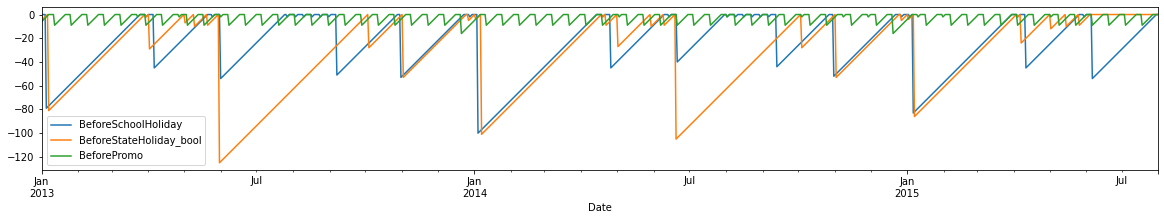

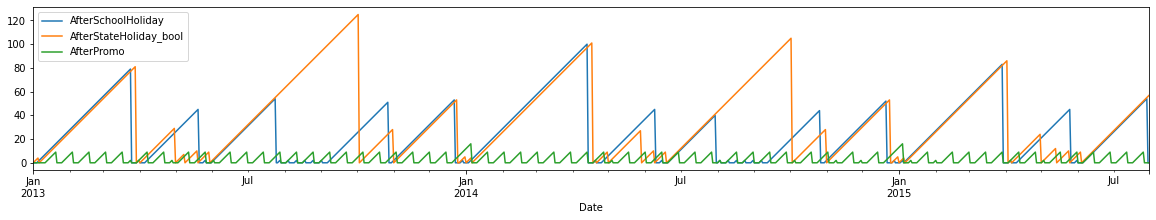

In [ ]:
plt.figure(figsize=(20,3))
df_train[df_train['Store'] == 280]['BeforeSchoolHoliday'].plot()
df_train[df_train['Store'] == 280]['BeforeStateHoliday_bool'].plot()
df_train[df_train['Store'] == 280]['BeforePromo'].plot()
plt.legend()
plt.show()

plt.figure(figsize=(20,3))
df_train[df_train['Store'] == 280]['AfterSchoolHoliday'].plot()
df_train[df_train['Store'] == 280]['AfterStateHoliday_bool'].plot()
df_train[df_train['Store'] == 280]['AfterPromo'].plot()
plt.legend()
plt.show()

#### "Suavizado" de columnas temporales 

In [ ]:
# Datos del store 1 ordenados por fecha
df_train[df_train[['Store']+columns]['Store'] == 1].sort_values('Date').head(20)

,Store,Promo,StateHoliday_bool,SchoolHoliday,AfterSchoolHoliday,BeforeSchoolHoliday,AfterStateHoliday_bool,BeforeStateHoliday_bool,AfterPromo,BeforePromo
Date,,,,,,,,,,
2013-01-01,1,0,True,1,0,0,0,0,0,-6
2013-01-02,1,0,False,1,0,0,1,-86,0,-5
2013-01-03,1,0,False,1,0,0,2,-85,0,-4
2013-01-04,1,0,False,1,0,0,3,-84,0,-3
2013-01-05,1,0,False,1,0,0,4,-83,0,-2
2013-01-06,1,0,False,1,0,0,5,-82,0,-1
2013-01-07,1,1,False,1,0,0,6,-81,0,0
2013-01-08,1,1,False,1,0,0,7,-80,0,0
2013-01-09,1,1,False,1,0,0,8,-79,0,0


In [ ]:
bwd_train = df_train[['Store']+columns].sort_index().groupby("Store").rolling(7, min_periods=1).sum()
bwd_test = df_test[['Store']+columns].sort_index().groupby("Store").rolling(7, min_periods=1).sum()
bwd_train.head(20)

Store  SchoolHoliday  StateHoliday_bool  Promo
Store Date                                                      
1     2013-01-01    1.0            1.0                1.0    0.0
      2013-01-02    2.0            2.0                1.0    0.0
      2013-01-03    3.0            3.0                1.0    0.0
      2013-01-04    4.0            4.0                1.0    0.0
      2013-01-05    5.0            5.0                1.0    0.0
      2013-01-06    6.0            6.0                1.0    0.0
      2013-01-07    7.0            7.0                1.0    1.0
      2013-01-08    7.0            7.0                0.0    2.0
      2013-01-09    7.0            7.0                0.0    3.0
      2013-01-10    7.0            7.0                0.0    4.0
      2013-01-11    7.0            7.0                0.0    5.0
      2013-01-12    7.0            6.0                0.0    5.0
      2013-01-13    7.0            5.0                0.0    5.0
      2013-01-14    7.0            4.0                0.0    4.0
      2013-01-15    7.0            3.0                0.0    3.0
      2013-01-16    7.0            2.0                0.0    2.0
      2013-01-17    7.0            1.0                0.0    1.0
      2013-01-18    7.0            0.0                0.0    0.0
      2013-01-19    7.0            0.0                0.0    0.0
      2013-01-20    7.0            0.0                0.0    0.0

In [ ]:
bwd_train.drop('Store',1,inplace=True)
bwd_train.reset_index(inplace=True)
bwd_test.drop('Store',1,inplace=True)
bwd_test.reset_index(inplace=True)

In [ ]:
bwd_train.head(20)

,Store,Date,SchoolHoliday,StateHoliday_bool,Promo
0,1,2013-01-01,1.0,1.0,0.0
1,1,2013-01-02,2.0,1.0,0.0
2,1,2013-01-03,3.0,1.0,0.0
3,1,2013-01-04,4.0,1.0,0.0
4,1,2013-01-05,5.0,1.0,0.0
5,1,2013-01-06,6.0,1.0,0.0
6,1,2013-01-07,7.0,1.0,1.0
7,1,2013-01-08,7.0,0.0,2.0
8,1,2013-01-09,7.0,0.0,3.0
9,1,2013-01-10,7.0,0.0,4.0


In [ ]:
# Ordena al reves
#rolling para crear ventanas rolling(dias de la ventana, minima cantidad de tiempo para una ventana(?))
fwd_train = df_train[['Store']+columns].sort_index(ascending=False).groupby("Store").rolling(7, min_periods=1).sum()
fwd_test = df_test[['Store']+columns].sort_index(ascending=False).groupby("Store").rolling(7, min_periods=1).sum()

In [ ]:
fwd_train.head(20)

Store  SchoolHoliday  StateHoliday_bool  Promo
Store Date                                                      
1     2015-07-31    1.0            1.0                0.0    1.0
      2015-07-30    2.0            2.0                0.0    2.0
      2015-07-29    3.0            3.0                0.0    3.0
      2015-07-28    4.0            4.0                0.0    4.0
      2015-07-27    5.0            5.0                0.0    5.0
      2015-07-26    6.0            5.0                0.0    5.0
      2015-07-25    7.0            5.0                0.0    5.0
      2015-07-24    7.0            4.0                0.0    4.0
      2015-07-23    7.0            3.0                0.0    3.0
      2015-07-22    7.0            2.0                0.0    2.0
      2015-07-21    7.0            1.0                0.0    1.0
      2015-07-20    7.0            0.0                0.0    0.0
      2015-07-19    7.0            0.0                0.0    0.0
      2015-07-18    7.0            0.0                0.0    0.0
      2015-07-17    7.0            0.0                0.0    1.0
      2015-07-16    7.0            0.0                0.0    2.0
      2015-07-15    7.0            0.0                0.0    3.0
      2015-07-14    7.0            0.0                0.0    4.0
      2015-07-13    7.0            0.0                0.0    5.0
      2015-07-12    7.0            0.0                0.0    5.0

In [ ]:
fwd_train.drop('Store',1,inplace=True)
fwd_train.reset_index(inplace=True)
fwd_test.drop('Store',1,inplace=True)
fwd_test.reset_index(inplace=True)

In [ ]:
df_train.reset_index(inplace=True)
df_test.reset_index(inplace=True)

In [ ]:
df_train = df_train.merge(bwd_train, 'left', ['Date', 'Store'], suffixes=['', '_bw'])
df_train = df_train.merge(fwd_train, 'left', ['Date', 'Store'], suffixes=['', '_fw'])
df_test = df_test.merge(bwd_test, 'left', ['Date', 'Store'], suffixes=['', '_bw'])
df_test = df_test.merge(fwd_test, 'left', ['Date', 'Store'], suffixes=['', '_fw'])

In [ ]:
df_train.drop(columns,1,inplace=True)
df_test.drop(columns,1,inplace=True)

In [ ]:
df_train.head()

,Date,Store,AfterSchoolHoliday,BeforeSchoolHoliday,AfterStateHoliday_bool,BeforeStateHoliday_bool,AfterPromo,BeforePromo,SchoolHoliday_bw,StateHoliday_bool_bw,Promo_bw,SchoolHoliday_fw,StateHoliday_bool_fw,Promo_fw
0,2015-07-31,1,0,0,57,0,0,0,5.0,0.0,5.0,1.0,0.0,1.0
1,2015-07-30,1,0,0,56,0,0,0,4.0,0.0,4.0,2.0,0.0,2.0
2,2015-07-29,1,0,0,55,0,0,0,3.0,0.0,3.0,3.0,0.0,3.0
3,2015-07-28,1,0,0,54,0,0,0,2.0,0.0,2.0,4.0,0.0,4.0
4,2015-07-27,1,0,0,53,0,0,0,1.0,0.0,1.0,5.0,0.0,5.0


In [ ]:
df_train["Date"] = pd.to_datetime(df_train.Date)
df_test["Date"] = pd.to_datetime(df_test.Date)

In [ ]:
df_train.head()

,Date,Store,AfterSchoolHoliday,BeforeSchoolHoliday,AfterStateHoliday_bool,BeforeStateHoliday_bool,AfterPromo,BeforePromo,SchoolHoliday_bw,StateHoliday_bool_bw,Promo_bw,SchoolHoliday_fw,StateHoliday_bool_fw,Promo_fw
0,2015-07-31,1,0,0,57,0,0,0,5.0,0.0,5.0,1.0,0.0,1.0
1,2015-07-30,1,0,0,56,0,0,0,4.0,0.0,4.0,2.0,0.0,2.0
2,2015-07-29,1,0,0,55,0,0,0,3.0,0.0,3.0,3.0,0.0,3.0
3,2015-07-28,1,0,0,54,0,0,0,2.0,0.0,2.0,4.0,0.0,4.0
4,2015-07-27,1,0,0,53,0,0,0,1.0,0.0,1.0,5.0,0.0,5.0


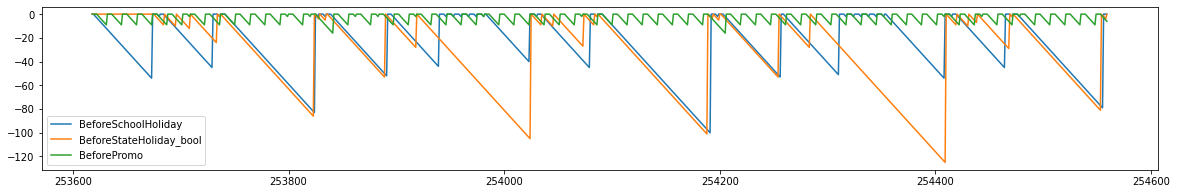

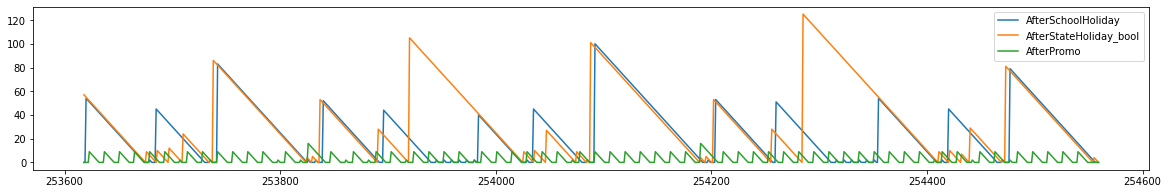

In [ ]:
plt.figure(figsize=(20,3))
df_train[df_train['Store'] == 280]['BeforeSchoolHoliday'].plot()
df_train[df_train['Store'] == 280]['BeforeStateHoliday_bool'].plot()
df_train[df_train['Store'] == 280]['BeforePromo'].plot()
plt.legend()
plt.show()

plt.figure(figsize=(20,3))
df_train[df_train['Store'] == 280]['AfterSchoolHoliday'].plot()
df_train[df_train['Store'] == 280]['AfterStateHoliday_bool'].plot()
df_train[df_train['Store'] == 280]['AfterPromo'].plot()
plt.legend()
plt.show()

In [ ]:
def join_df(left, right, left_on, right_on=None):
    if right_on is None: right_on = left_on
    return left.merge(right, how='left', left_on=left_on, right_on=right_on, 
                      suffixes=("", "_y"))

In [ ]:
joined_train = join_df(joined_train, df_train, ['Store', 'Date'])
joined_test = join_df(joined_test, df_test, ['Store', 'Date'])

In [ ]:
joined_train.shape

(1017209, 81)

In [ ]:
joined_train.to_feather('all_preprocessed_train.fth')

In [ ]:
joined_test.to_feather('all_preprocessed_test.fth')

Text(0.5, 1.0, 'Promo')

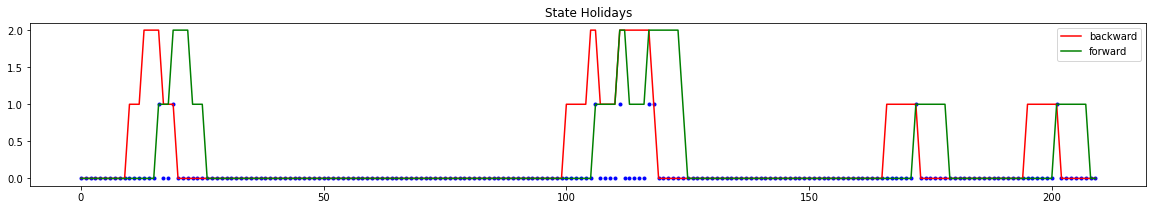

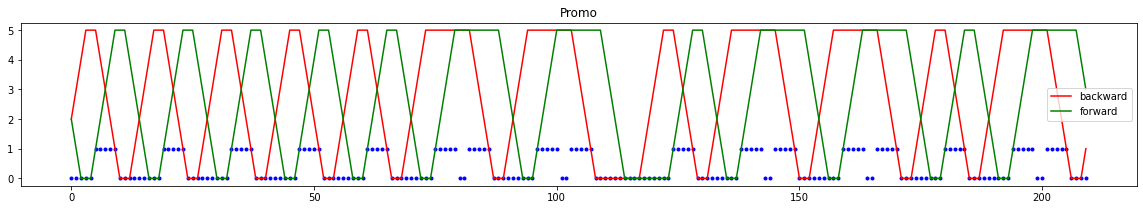

In [ ]:
plt.figure(figsize=(20,3))
plt.plot(joined_train[joined_train['Store']==280]['StateHoliday_bool'].values[100:310]*1.0, c='b', marker='.', linestyle='None')
plt.plot(joined_train[joined_train['Store']==280]['StateHoliday_bool_bw'].values[100:310]*1.0, c='r', label='backward')
plt.plot(joined_train[joined_train['Store']==280]['StateHoliday_bool_fw'].values[100:310]*1.0, c='g', label='forward')
plt.legend()
plt.title('State Holidays')
plt.figure(figsize=(20,3))
plt.plot(joined_train[joined_train['Store']==280]['Promo'].values[100:310]*1.0, c='b', marker='.', linestyle='None')
plt.plot(joined_train[joined_train['Store']==280]['Promo_bw'].values[100:310]*1.0, c='r', label='backward')
plt.plot(joined_train[joined_train['Store']==280]['Promo_fw'].values[100:310]*1.0, c='g', label='forward')
plt.legend()
plt.title('Promo')

In [ ]:
joined_train

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,Year,Month,Week,Day,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,CompetitionOpenSince,Promo2Since,State,file,week,trend,Date_y,Month_y,Day_y,file_DE,week_DE,trend_DE,Date_DE,State_DE,Month_DE,Day_DE,file_y,Max_TemperatureC,...,Min_TemperatureC,Dew_PointC,MeanDew_PointC,Min_DewpointC,Max_Humidity,Mean_Humidity,Min_Humidity,Max_Sea_Level_PressurehPa,Mean_Sea_Level_PressurehPa,Min_Sea_Level_PressurehPa,Max_VisibilityKm,Mean_VisibilityKm,Min_VisibilitykM,Max_Wind_SpeedKm_h,Mean_Wind_SpeedKm_h,Max_Gust_SpeedKm_h,Precipitationmm,CloudCover,Events,WindDirDegrees,Year_y,Week_y,StateName,CompetitionDaysOpen,CompetitionMonthsOpen,Promo2Days,Promo2Weeks,StateHoliday_bool,AfterSchoolHoliday,BeforeSchoolHoliday,AfterStateHoliday_bool,BeforeStateHoliday_bool,AfterPromo,BeforePromo,SchoolHoliday_bw,StateHoliday_bool_bw,Promo_bw,SchoolHoliday_fw,StateHoliday_bool_fw,Promo_fw
0,1,5,2015-07-31,5263,555,1,1,0,1,2015,7,31,31,c,a,1270.0,9,2008,0,1,1990,-,2008-09-15,1990-01-01,HE,Rossmann_DE_HE,2015-08-02 - 2015-08-08,85,2015-08-02,8,2,Rossmann_DE,2015-08-02 - 2015-08-08,83,2015-08-02,None,8,2,Hessen,23,...,8,9,6,3,98,54,18,1021,1018,1015,31.0,15.0,10.0,24,11,21.0,0.00,1.0,Fog,13,2015,31,Hessen,2510,24,9342,25,False,0,0,57,0,0,0,5.0,0.0,5.0,1.0,0.0,1.0
1,2,5,2015-07-31,6064,625,1,1,0,1,2015,7,31,31,a,a,570.0,11,2007,1,13,2010,"Jan,Apr,Jul,Oct",2007-11-15,2010-03-29,TH,Rossmann_DE_TH,2015-08-02 - 2015-08-08,80,2015-08-02,8,2,Rossmann_DE,2015-08-02 - 2015-08-08,83,2015-08-02,None,8,2,Thueringen,19,...,7,9,6,3,100,62,25,1021,1019,1017,10.0,10.0,10.0,14,11,21.0,0.00,4.0,Fog,309,2015,31,Thueringen,2815,24,1950,25,False,0,0,67,0,0,0,5.0,0.0,5.0,1.0,0.0,1.0
2,3,5,2015-07-31,8314,821,1,1,0,1,2015,7,31,31,a,a,14130.0,12,2006,1,14,2011,"Jan,Apr,Jul,Oct",2006-12-15,2011-04-04,NW,Rossmann_DE_NW,2015-08-02 - 2015-08-08,86,2015-08-02,8,2,Rossmann_DE,2015-08-02 - 2015-08-08,83,2015-08-02,None,8,2,NordrheinWestfalen,21,...,6,10,7,4,100,61,24,1022,1019,1017,31.0,14.0,10.0,14,5,21.0,0.00,2.0,Fog,354,2015,31,NordrheinWestfalen,3150,24,1579,25,False,0,0,57,0,0,0,5.0,0.0,5.0,1.0,0.0,1.0
3,4,5,2015-07-31,13995,1498,1,1,0,1,2015,7,31,31,c,c,620.0,9,2009,0,1,1990,-,2009-09-15,1990-01-01,BE,Rossmann_DE_BE,2015-08-02 - 2015-08-08,74,2015-08-02,8,2,Rossmann_DE,2015-08-02 - 2015-08-08,83,2015-08-02,None,8,2,Berlin,19,...,9,9,7,4,94,61,30,1019,1017,1014,10.0,10.0,10.0,23,16,21.0,0.00,6.0,Sunny,282,2015,31,Berlin,2145,24,9342,25,False,0,0,67,0,0,0,5.0,0.0,5.0,1.0,0.0,1.0
4,5,5,2015-07-31,4822,559,1,1,0,1,2015,7,31,31,a,a,29910.0,4,2015,0,1,1990,-,2015-04-15,1990-01-01,SN,Rossmann_DE_SN,2015-08-02 - 2015-08-08,82,2015-08-02,8,2,Rossmann_DE,2015-08-02 - 2015-08-08,83,2015-08-02,None,8,2,Sachsen,20,...,10,8,6,5,82,55,26,1020,1018,1016,10.0,10.0,10.0,14,11,21.0,0.00,4.0,Sunny,290,2015,31,Sachsen,107,3,9342,25,False,0,0,57,0,0,0,5.0,0.0,5.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1017204,1111,2,2013-01-01,0,0,0,0,a,1,2013,1,1,1,a,a,1900.0,6,2014,1,31,2013,"Jan,Apr,Jul,Oct",2014-06-15,2013-07-29,NW,Rossmann_DE_NW,2013-01-06 - 2013-01-12,63,2013-01-06,1,6,Rossmann_DE,2013-01-06 - 2013-01-12,62,2013-01-06,None,1,6,NordrheinWestfalen,8,...,2,7,5,1,94,87,65,1013,1005,1001,31.0,12.0,4.0,39,26,58.0,5.08,6.0,Rain,215,2013,1,NordrheinWestfalen,0,0,0,0,True,0,0,0,0,0,-6,1.0,1.0,0.0,4.0,1.0,1.0
1017205,1112,2,2013-01-01,0,0,0,0,a,1,2013,1,1,1,c,c,1880.0,4,2006,0,1,1990,-,2006-04-15,1990-01-01,NW,Rossmann_DE_NW,2013-01-06 - 2013-01-12,63,2013-01-06,1,6,Rossmann_DE,2013-01-06 - 2013-01-12,62,2013-01-06,None,1,6,NordrheinWestfale

#04-Normalize and encode


In [ ]:
df_train = pd.read_feather('all_preprocessed_train.fth')
df_test = pd.read_feather('all_preprocessed_test.fth')

In [ ]:
df_train.shape, df_test.shape

((1017209, 81), (41088, 80))

In [ ]:
# Verificación de que se hicieron bien las cosas en testa también
set(df_train.columns) - set(df_test.columns)

{'Customers', 'Sales'}

In [ ]:
(df_train['CompetitionDistance'].isna()).sum()

0

## Categorical vars

Entre los datos categóricos agregamos 'Promo', 'SchoolHoliday', y'StateHoliday_bool', ya que los consideramos categóricos, y no entendemos por qué originalmente se agregan entre los datos continuos

In [ ]:
cat_vars = ['Store', 'DayOfWeek', 'Year', 'Month', 'Day', 'StateHoliday', 
            'CompetitionMonthsOpen', 'Promo2Weeks', 
            'StoreType', 'Assortment', 'PromoInterval', 
            'CompetitionOpenSinceYear', 'Promo2SinceYear', 
            'State', 'Week', 'Events', 'Promo_fw', 'Promo_bw', 
            'StateHoliday_bool_fw', 'StateHoliday_bool_bw', 'SchoolHoliday_fw', 
            'SchoolHoliday_bw','Promo', 'SchoolHoliday', 'StateHoliday_bool']

In [ ]:
#DataFrameSummary(df_train[cat_vars]).summary()

In [ ]:
DataFrameSummary(df_train[cat_vars]).summary().loc[['uniques', 'types', 'missing']].T

,uniques,types,missing
Store,1115,numeric,0
DayOfWeek,7,numeric,0
Year,3,numeric,0
Month,12,numeric,0
Day,31,numeric,0
StateHoliday,4,categorical,0
CompetitionMonthsOpen,25,numeric,0
Promo2Weeks,26,numeric,0
StoreType,4,categorical,0
Assortment,3,categorical,0


In [ ]:
# Reemplaza nulls por "" en categoricas
# for v in cat_vars: df_train.loc[df_train[v].isnull(), v] = ""

In [ ]:
# for v in cat_vars: df_test.loc[df_test[v].isnull(), v] = ""

## Continuos Vars

In [ ]:
contin_vars = ['CompetitionDistance', 
               'Max_TemperatureC', 'Mean_TemperatureC', 'Min_TemperatureC', 
               'Precipitationmm', 'Max_Humidity', 'Mean_Humidity', 'Min_Humidity', 
               'Max_Wind_SpeedKm_h', 'Mean_Wind_SpeedKm_h', 'CloudCover', 'trend', 
               'trend_DE', 'AfterStateHoliday_bool', 'BeforeStateHoliday_bool']

In [ ]:
DataFrameSummary(df_train[contin_vars]).summary().loc[['uniques', 'types', 'missing']].T

,uniques,types,missing
CompetitionDistance,654,numeric,0
Max_TemperatureC,50,numeric,0
Mean_TemperatureC,45,numeric,0
Min_TemperatureC,40,numeric,0
Precipitationmm,40,numeric,0
Max_Humidity,52,numeric,0
Mean_Humidity,71,numeric,0
Min_Humidity,93,numeric,0
Max_Wind_SpeedKm_h,42,numeric,0
Mean_Wind_SpeedKm_h,27,numeric,0


In [ ]:
# Reemplaza nulls por 0 en continuas
# for v in contin_vars: df_train.loc[df_train[v].isnull(), v] = 0
# for v in contin_vars: df_test.loc[df_test[v].isnull(), v] = 0

## Normalización en continuas y LabelEncode en Categoricas

In [ ]:
# pip install sklearn_pandas
from sklearn_pandas import DataFrameMapper

In [ ]:
cat_maps = [(o, LabelEncoder()) for o in cat_vars]
contin_maps = [([o], StandardScaler()) for o in contin_vars]

In [ ]:
mapper_cat = DataFrameMapper(cat_maps)
_ = mapper_cat.fit(df_train)

In [ ]:
# Assortment es la novena posición en cat_maps
N = 10
print(list(zip(df_train['Assortment'].values[:N], mapper_cat.transform(df_train)[:,9][:N])))
print(list(zip(df_train['Events'].values[:N], mapper_cat.transform(df_train)[:,15][:N])))
print(list(zip(df_train['Year'].values[:N], mapper_cat.transform(df_train)[:,2][:N])))

[('a', 0), ('a', 0), ('a', 0), ('c', 2), ('a', 0), ('a', 0), ('c', 2), ('a', 0), ('c', 2), ('a', 0)]
[('Fog', 0), ('Fog', 0), ('Fog', 0), ('Sunny', 20), ('Sunny', 20), ('Sunny', 20), ('Rain', 10), ('Rain', 10), ('Fog', 0), ('Sunny', 20)]
[(2015, 2), (2015, 2), (2015, 2), (2015, 2), (2015, 2), (2015, 2), (2015, 2), (2015, 2), (2015, 2), (2015, 2)]


In [ ]:
mapper_cont = DataFrameMapper(contin_maps)
_ = mapper_cont.fit(df_train)

In [ ]:
# La hacemos con todas ahora
df_train[cat_vars] = mapper_cat.transform(df_train)
df_test[cat_vars] = mapper_cat.transform(df_test)

In [ ]:
df_train[contin_vars] = mapper_cont.transform(df_train)
df_test[contin_vars] = mapper_cont.transform(df_test)

In [ ]:
df_train.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,Year,Month,Week,Day,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,CompetitionOpenSince,Promo2Since,State,file,week,trend,Date_y,Month_y,Day_y,file_DE,week_DE,trend_DE,Date_DE,State_DE,Month_DE,Day_DE,file_y,Max_TemperatureC,...,Min_TemperatureC,Dew_PointC,MeanDew_PointC,Min_DewpointC,Max_Humidity,Mean_Humidity,Min_Humidity,Max_Sea_Level_PressurehPa,Mean_Sea_Level_PressurehPa,Min_Sea_Level_PressurehPa,Max_VisibilityKm,Mean_VisibilityKm,Min_VisibilitykM,Max_Wind_SpeedKm_h,Mean_Wind_SpeedKm_h,Max_Gust_SpeedKm_h,Precipitationmm,CloudCover,Events,WindDirDegrees,Year_y,Week_y,StateName,CompetitionDaysOpen,CompetitionMonthsOpen,Promo2Days,Promo2Weeks,StateHoliday_bool,AfterSchoolHoliday,BeforeSchoolHoliday,AfterStateHoliday_bool,BeforeStateHoliday_bool,AfterPromo,BeforePromo,SchoolHoliday_bw,StateHoliday_bool_bw,Promo_bw,SchoolHoliday_fw,StateHoliday_bool_fw,Promo_fw
0,0,4,2015-07-31,5263,555,1,1,0,1,2,6,30,30,2,0,-0.511043,9,13,0,1,0,0,2008-09-15,1990-01-01,4,Rossmann_DE_HE,2015-08-02 - 2015-08-08,1.744361,2015-08-02,8,2,Rossmann_DE,2015-08-02 - 2015-08-08,1.743049,2015-08-02,None,8,2,Hessen,1.024446,...,0.325047,9,6,3,0.611120,-1.510789,-1.626560,1021,1018,1015,31.0,15.0,10.0,0.148437,-0.147662,21.0,-0.315778,-1.859165,0,13,2015,31,Hessen,2510,24,9342,25,0,0,0,0.644376,1.072424,0,0,5,0,5,1,0,1
1,1,4,2015-07-31,6064,625,1,1,0,1,2,6,30,30,0,0,-0.593412,11,12,1,13,2,2,2007-11-15,2010-03-29,11,Rossmann_DE_TH,2015-08-02 - 2015-08-08,1.303439,2015-08-02,8,2,Rossmann_DE,2015-08-02 - 2015-08-08,1.743049,2015-08-02,None,8,2,Thueringen,0.551899,...,0.170242,9,6,3,0.870277,-0.905024,-1.269897,1021,1019,1017,10.0,10.0,10.0,-0.970080,-0.147662,21.0,-0.315778,-0.493858,0,309,2015,31,Thueringen,2815,24,1950,25,0,0,0,0.965073,1.072424,0,0,5,0,5,1,0,1
2,2,4,2015-07-31,8314,821,1,1,0,1,2,6,30,30,0,0,1.002195,12,11,1,14,3,2,2006-12-15,2011-04-04,6,Rossmann_DE_NW,2015-08-02 - 2015-08-08,1.832546,2015-08-02,8,2,Rossmann_DE,2015-08-02 - 2015-08-08,1.743049,2015-08-02,None,8,2,NordrheinWestfalen,0.788172,...,0.015437,10,7,4,0.870277,-0.980745,-1.320848,1022,1019,1017,31.0,14.0,10.0,-0.970080,-1.165096,21.0,-0.315778,-1.404063,0,354,2015,31,NordrheinWestfalen,3150,24,1579,25,0,0,0,0.644376,1.072424,0,0,5,0,5,1,0,1
3,3,4,2015-07-31,13995,1498,1,1,0,1,2,6,30,30,2,2,-0.587528,9,14,0,1,0,0,2009-09-15,1990-01-01,0,Rossmann_DE_BE,2015-08-02 - 2015-08-08,0.774331,2015-08-02,8,2,Rossmann_DE,2015-08-02 - 2015-08-08,1.743049,2015-08-02,None,8,2,Berlin,0.551899,...,0.479853,9,7,4,0.092806,-0.980745,-1.015137,1019,1017,1014,10.0,10.0,10.0,0.036585,0.700200,21.0,-0.315778,0.416347,20,282,2015,31,Berlin,2145,24,9342,25,0,0,0,0.965073,1.072424,0,0,5,0,5,1,0,1
4,4,4,2015-07-31,4822,559,1,1,0,1,2,6,30,30,0,0,2.859029,4,20,0,1,0,0,2015-04-15,1990-01-01,9,Rossmann_DE_SN,2015-08-02 - 2015-08-08,1.479808,2015-08-02,8,2,Rossmann_DE,2015-08-02 - 2015-08-08,1.743049,2015-08-02,None,8,2,Sachsen,0.670036,...,0.634658,8,6,5,-1.462136,-1.435069,-1.218945,1020,1018,1016,10.0,10.0,10.0,-0.970080,-0.147662,21.0,-0.315778,-0.493858,20,290,2015,31,Sachsen,107,3,9342,25,0,0,0,0.644376,1.072424,0,0,5,0,5,1,0,1


In [ ]:
DataFrameSummary(df_train[cat_vars]).summary().loc[['uniques', 'types']]

,Store,DayOfWeek,Year,Month,Day,StateHoliday,CompetitionMonthsOpen,Promo2Weeks,StoreType,Assortment,PromoInterval,CompetitionOpenSinceYear,Promo2SinceYear,State,Week,Events,Promo_fw,Promo_bw,StateHoliday_bool_fw,StateHoliday_bool_bw,SchoolHoliday_fw,SchoolHoliday_bw,Promo,SchoolHoliday,StateHoliday_bool
uniques,1115,7,3,12,31,4,25,26,4,3,4,21,8,12,52,22,6,6,3,3,8,8,2,2,2
types,numeric,numeric,numeric,numeric,numeric,numeric,numeric,numeric,numeric,numeric,numeric,numeric,numeric,numeric,numeric,numeric,numeric,numeric,numeric,numeric,numeric,numeric,bool,bool,bool


## Final processing

In [ ]:
df_train.shape

(1017209, 81)

In [ ]:
df_sales = df_train[df_train.Sales!=0]

In [ ]:
df_sales.shape

(844338, 81)

In [ ]:
df_test.reset_index(inplace=True)

In [ ]:
df_sales.reset_index(inplace=True)

In [ ]:
df_sales.to_feather('train_normalized_data.fth')

In [ ]:
df_test.to_feather('test_normalized_data.fth')

In [ ]:
(df_test['Open'] == 0).sum()

5984

In [ ]:
(df_sales['Open'] == 0).sum()

0

In [ ]:
(df_train['CompetitionDistance'].isna()).sum()

0

##04.1-Baselines

In [ ]:
df = pd.read_feather('train_normalized_data.fth')
df_test = pd.read_feather('test_normalized_data.fth')

In [ ]:
df_train = df[df.Date < datetime.datetime(2015, 7, 1)]  
df_val = df[df.Date >= datetime.datetime(2015, 7, 1)]
len(df_train)/len(df), len(df_val)/len(df), len(df), len(df_val)

(0.9642465458145908, 0.035753454185409164, 844338, 30188)

In [ ]:
final_train = False

In [ ]:
def get_metric(sales, sales_):
    return np.sqrt((((sales - sales_)/sales)**2).sum()/len(sales))


$\textrm{RMSE} = \sqrt{\frac{1}{n} \sum_{i=1}^{n} \left(\frac{\hat{y}_i - y_i}{y_i}\right)^2}$


In [ ]:
df_train.columns

Index(['index', 'Store', 'DayOfWeek', 'Date', 'Sales', 'Customers', 'Open',
       'Promo', 'StateHoliday', 'SchoolHoliday', 'Year', 'Month', 'Week',
       'Day', 'StoreType', 'Assortment', 'CompetitionDistance',
       'CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear', 'Promo2',
       'Promo2SinceWeek', 'Promo2SinceYear', 'PromoInterval',
       'CompetitionOpenSince', 'Promo2Since', 'State', 'file', 'week', 'trend',
       'Date_y', 'Month_y', 'Day_y', 'file_DE', 'week_DE', 'trend_DE',
       'Date_DE', 'State_DE', 'Month_DE', 'Day_DE', 'file_y',
       'Max_TemperatureC', 'Mean_TemperatureC', 'Min_TemperatureC',
       'Dew_PointC', 'MeanDew_PointC', 'Min_DewpointC', 'Max_Humidity',
       'Mean_Humidity', 'Min_Humidity', 'Max_Sea_Level_PressurehPa',
       'Mean_Sea_Level_PressurehPa', 'Min_Sea_Level_PressurehPa',
       'Max_VisibilityKm', 'Mean_VisibilityKm', 'Min_VisibilitykM',
       'Max_Wind_SpeedKm_h', 'Mean_Wind_SpeedKm_h', 'Max_Gust_SpeedKm_h',
       'Precipitatio

In [ ]:
df_train['Events']

30188     20
30189     20
30190      0
30191     20
30192     20
          ..
844333    10
844334    10
844335    10
844336     1
844337    10
Name: Events, Length: 814150, dtype: int64

In [ ]:
max_sales = df_train['Sales'].max()
df.loc[:, 'Sales_norm'] = df['Sales'].values/max_sales

In [ ]:
df_train.loc[:, 'Sales_norm'] = df_train['Sales'].values/max_sales
df_val.loc[:, 'Sales_norm'] = df_val['Sales'].values/max_sales

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1596: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1743: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)


In [ ]:
print('Train:')
print(get_metric(df_train['Sales_norm'], 
                 df_train['Sales_norm'].mean()))
print('Val:')
get_metric(df_val['Sales_norm'], 
           df_train['Sales_norm'].mean())

Train:
0.6371089378658443
Val:


0.5496723521813062

In [ ]:
def get_mean_by_column(column, sales_str):
    group_means_dict = {}
    group_mean_list = []
    for col_value, group_df in df_train.groupby(column):
        group_mean =  group_df[group_df[sales_str] > 0][sales_str].mean()
        group_means_dict[col_value] = group_mean
        group_mean_list.append(group_mean)
    print('Train:', get_metric(df_train[sales_str], 
                               df_train[column].apply(group_means_dict.get)))
    print('Val:', get_metric(df_val[sales_str], 
                             df_val[column].apply(group_means_dict.get)))
    return group_means_dict, group_mean_list

In [ ]:
# Media por store
_ = get_mean_by_column('Store', 'Sales_norm')

Train: 0.39609135212418334
Val: 0.3071746085338872


In [ ]:
# Media por dia de la semana
_ = get_mean_by_column('DayOfWeek', 'Sales_norm')

Train: 0.600887492275444
Val: 0.506139218663547


In [ ]:
# Media por numera de semana (1-52)
_ = get_mean_by_column('Week', 'Sales_norm')

Train: 0.6077405789213656
Val: 0.5171468581189805


In [ ]:
_ = get_mean_by_column('Month', 'Sales_norm')

Train: 0.6326710739722307
Val: 0.5444650400703042


In [ ]:
_ = get_mean_by_column('StateHoliday', 'Sales_norm')

Train: 0.637967104604832
Val: 0.5494193814701546


In [ ]:
_ = get_mean_by_column('SchoolHoliday', 'Sales_norm')

Train: 0.6352131730794036
Val: 0.552288625488801


In [ ]:
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Embedding, Input, Flatten, Concatenate, Dense, BatchNormalization, Activation, LeakyReLU, Dropout
from tensorflow.keras.regularizers import l2
from tensorflow.keras import optimizers
from tensorflow.keras import backend as K
from tensorflow.keras.utils import to_categorical

In [ ]:
def rmspe(y_true, y_pred):
    return K.sqrt(K.mean(K.square((y_true - y_pred)/y_true)))

In [ ]:
def get_keras_LR(X_columns, hidden_units=1):
    inputs = []
    activation = 'linear'
    if hidden_units>1:
        activation = 'relu'
    for i, col in enumerate(X_columns):
        inp = Input(shape=(X_train[i].shape[1],), name=f"{col}_input")
        inputs.append(inp)
    if len(X_columns)>1:
        concat_out = Concatenate()(inputs)
        dense_out = Dense(hidden_units, name='Dense', activation=activation)(concat_out)
    else:
        dense_out = Dense(hidden_units, name='Dense', activation=activation)(inputs[0])
    if hidden_units>1:
        dense_out = Dense(1, name='Dense_out')(dense_out)
    model = Model(inputs, dense_out)
    model.compile(optimizers.Adam(lr=0.0001), loss='mse', metrics=[rmspe, 'mse'])
    return model


def get_embedings_NN(X_columns, hidden_units = 20, activation = 'relu'):
    embed_outs = []
    inputs = []
    for i, col in enumerate(X_columns):
        inp = Input(shape=(1,), name=f"{col}_input")
        inputs.append(inp)
        if col in embed_outs_dict:
            embed_out = Embedding(len(np.unique(X_train[i])), embed_outs_dict[col], name=f"{col}_embedding", mask_zero=False)(inp)
            out = Flatten(name=f"{col}_flatten")(embed_out)
            embed_outs.append(out)
        else:
            embed_outs.append(inp)
        
    if len(X_columns)>1:
        concat_out = Concatenate()(embed_outs)
        dense_out = Dense(hidden_units, activation=activation)(concat_out)
    else:
        dense_out = Dense(hidden_units, activation=activation)(out)
    out = Dense(1)(dense_out)
    model = Model(inputs, out)
    model.compile(optimizers.Adam(lr=0.0001), loss='mse', metrics=[rmspe, 'mse'])
    return model

In [ ]:
with_embed = True

embed_outs_dict = {'Store': 2, 'DayOfWeek': 2} #,  'Week': 2, 'Month': 2}
X_columns = list(embed_outs_dict.keys())# + ['BeforeStateHoliday_bool', 'Max_TemperatureC'] # ['Precipitationmm']

if final_train:
    X_train = np.hsplit(df[X_columns].values, len(X_columns))
    y_train = df['Sales_norm']
else:
    X_train = np.hsplit(df_train[X_columns].values, len(X_columns))
    y_train = df_train['Sales_norm']
    
X_val = np.hsplit(df_val[X_columns].values, len(X_columns))
X_test = np.hsplit(df_test[X_columns].values, len(X_columns))

if not with_embed:
    for i in range(len(X_train)):
        X_train[i] = to_categorical(X_train[i])
        X_val[i] = to_categorical(X_val[i])
        X_test[i] = to_categorical(X_test[i])

y_val = df_val['Sales_norm']

In [ ]:
if with_embed:
    model = get_embedings_NN(X_columns)
else:
    model = get_keras_LR(X_columns, hidden_units=20)
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
Store_input (InputLayer)        [(None, 1)]          0                                            
__________________________________________________________________________________________________
DayOfWeek_input (InputLayer)    [(None, 1)]          0                                            
__________________________________________________________________________________________________
Store_embedding (Embedding)     (None, 1, 2)         2230        Store_input[0][0]                
__________________________________________________________________________________________________
DayOfWeek_embedding (Embedding) (None, 1, 2)         14          DayOfWeek_input[0][0]            
______________________________________________________________________________________________

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [ ]:
# weights = model.get_weights()
# weights[0] = np.array(np.array(stores_mean_list).reshape(-1, 1))
# model.set_weights(weights)

In [ ]:
from tensorflow.keras import callbacks

In [ ]:
# model.evaluate(X_val, y_val)

In [ ]:
# np.sqrt(0.0951)

In [ ]:
epochs = 5
model.compile(optimizers.Adam(lr=0.001), loss='mse', metrics=[rmspe, 'mse'])
cbs = [callbacks.ReduceLROnPlateau(monitor='val_rmspe', mode='min', verbose=1, patience=2), callbacks.ModelCheckpoint('best_val_rmspe.hdf5', monitor='val_rmspe', mode='min', verbose=1, save_best_only=True)]
if final_train:
    model.fit(X_train, y_train, epochs=epochs, callbacks=cbs)
else:
    model.fit(X_train, y_train, epochs=epochs, validation_data=(X_val, y_val), callbacks=cbs)

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


Epoch 1/5
25443/25443 [==============================] - 39s 2ms/step - loss: 0.0019 - rmspe: 0.2824 - mse: 0.0019 - val_loss: 0.0014 - val_rmspe: 0.2163 - val_mse: 0.0014

Epoch 00001: val_rmspe improved from inf to 0.21626, saving model to best_val_rmspe.hdf5
Epoch 2/5
25443/25443 [==============================] - 37s 1ms/step - loss: 0.0018 - rmspe: 0.2667 - mse: 0.0018 - val_loss: 0.0015 - val_rmspe: 0.2044 - val_mse: 0.0015

Epoch 00002: val_rmspe improved from 0.21626 to 0.20441, saving model to best_val_rmspe.hdf5
Epoch 3/5
25443/25443 [==============================] - 37s 1ms/step - loss: 0.0018 - rmspe: 0.2653 - mse: 0.0018 - val_loss: 0.0014 - val_rmspe: 0.2181 - val_mse: 0.0014

Epoch 00003: val_rmspe did not improve from 0.20441
Epoch 4/5
25443/25443 [==============================] - 37s 1ms/step - loss: 0.0018 - rmspe: 0.2645 - mse: 0.0018 - val_loss: 0.0013 - val_rmspe: 0.2142 - val_mse: 0.0013

Epoch 00004: ReduceLROnPlateau reducing learning rate to 0.000100000004749

In [ ]:
model.load_weights('best_val_rmspe.hdf5')

In [ ]:
model.evaluate(X_train, y_train)

25443/25443 [==============================] - 29s 1ms/step - loss: 0.0019 - rmspe: 0.2219 - mse: 0.0019


[0.0018605783116072416, 0.22186388075351715, 0.0018605783116072416]

In [ ]:
model.evaluate(X_val, y_val)

944/944 [==============================] - 1s 1ms/step - loss: 0.0015 - rmspe: 0.2044 - mse: 0.0015


[0.0014959931140765548, 0.20441095530986786, 0.0014959931140765548]

In [ ]:
from matplotlib import pyplot as plt

In [ ]:
def plot_embed(layer_name, cat_names):
    Y = model.get_layer(layer_name).get_weights()[0]
    print(Y.shape)
    plt.figure(figsize=(8,8))
    plt.scatter(-Y[:, 0], -Y[:, 1])
    for i, txt in enumerate(cat_names):
        plt.annotate(txt, (-Y[i, 0],-Y[i, 1]), xytext = (-5, 8), textcoords = 'offset points')

(7, 2)


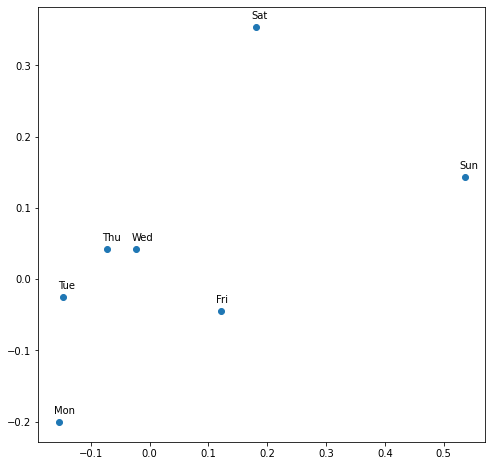

In [ ]:
plot_embed('DayOfWeek_embedding', ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat','Sun'])

(1115, 2)


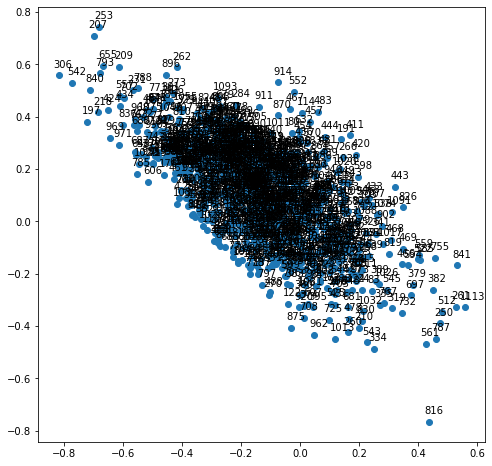

In [ ]:
plot_embed('Store_embedding', list(range(1115)))

In [ ]:
train_predictions = model.predict(X_train)*max_sales
get_metric(df_train['Sales'].values, train_predictions.reshape(-1))

0.2825708506949548

In [ ]:
test_predictions = model.predict(X_test)*max_sales
test_predictions[df_test['Open'] == 0] = 0

In [ ]:
sample_csv = pd.read_csv('/content/drive/MyDrive/Redes TPS/TP2/data/sample_submission.csv')
sample_csv['Sales'] = test_predictions
sample_csv.head()

sample_csv.to_csv(f'submision_baseline_{"-".join(X_columns)}.csv', index=False)


#05-Embeddings

In [ ]:
df_test = pd.read_feather('test_normalized_data.fth')

- Para verificar que columnas tiene originalmente tests. Por ejemplo, como es de esperar, la columna customers no es dato y podría intentar estimarse tambien
- Es bastante discutible usar el clima y temperatura (Se puede usar el forecast si es en el futuro
- En un caso real no parece sensato usar google trend

In [ ]:
df_test.columns

Index(['index', 'Id', 'Store', 'DayOfWeek', 'Date', 'Open', 'Promo',
       'StateHoliday', 'SchoolHoliday', 'Year', 'Month', 'Week', 'Day',
       'StoreType', 'Assortment', 'CompetitionDistance',
       'CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear', 'Promo2',
       'Promo2SinceWeek', 'Promo2SinceYear', 'PromoInterval',
       'CompetitionOpenSince', 'Promo2Since', 'State', 'file', 'week', 'trend',
       'Date_y', 'Month_y', 'Day_y', 'file_DE', 'week_DE', 'trend_DE',
       'Date_DE', 'State_DE', 'Month_DE', 'Day_DE', 'file_y',
       'Max_TemperatureC', 'Mean_TemperatureC', 'Min_TemperatureC',
       'Dew_PointC', 'MeanDew_PointC', 'Min_DewpointC', 'Max_Humidity',
       'Mean_Humidity', 'Min_Humidity', 'Max_Sea_Level_PressurehPa',
       'Mean_Sea_Level_PressurehPa', 'Min_Sea_Level_PressurehPa',
       'Max_VisibilityKm', 'Mean_VisibilityKm', 'Min_VisibilitykM',
       'Max_Wind_SpeedKm_h', 'Mean_Wind_SpeedKm_h', 'Max_Gust_SpeedKm_h',
       'Precipitationmm', 'CloudCove

In [ ]:
df = pd.read_feather('train_normalized_data.fth')

In [ ]:
df.head(3)

,index,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,Year,Month,Week,Day,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,CompetitionOpenSince,Promo2Since,State,file,week,trend,Date_y,Month_y,Day_y,file_DE,week_DE,trend_DE,Date_DE,State_DE,Month_DE,Day_DE,file_y,...,Min_TemperatureC,Dew_PointC,MeanDew_PointC,Min_DewpointC,Max_Humidity,Mean_Humidity,Min_Humidity,Max_Sea_Level_PressurehPa,Mean_Sea_Level_PressurehPa,Min_Sea_Level_PressurehPa,Max_VisibilityKm,Mean_VisibilityKm,Min_VisibilitykM,Max_Wind_SpeedKm_h,Mean_Wind_SpeedKm_h,Max_Gust_SpeedKm_h,Precipitationmm,CloudCover,Events,WindDirDegrees,Year_y,Week_y,StateName,CompetitionDaysOpen,CompetitionMonthsOpen,Promo2Days,Promo2Weeks,StateHoliday_bool,AfterSchoolHoliday,BeforeSchoolHoliday,AfterStateHoliday_bool,BeforeStateHoliday_bool,AfterPromo,BeforePromo,SchoolHoliday_bw,StateHoliday_bool_bw,Promo_bw,SchoolHoliday_fw,StateHoliday_bool_fw,Promo_fw
0,0,0,4,2015-07-31,5263,555,1,1,0,1,2,6,30,30,2,0,-0.511043,9,13,0,1,0,0,2008-09-15,1990-01-01,4,Rossmann_DE_HE,2015-08-02 - 2015-08-08,1.744361,2015-08-02,8,2,Rossmann_DE,2015-08-02 - 2015-08-08,1.743049,2015-08-02,None,8,2,Hessen,...,0.325047,9,6,3,0.611120,-1.510789,-1.626560,1021,1018,1015,31.0,15.0,10.0,0.148437,-0.147662,21.0,-0.315778,-1.859165,0,13,2015,31,Hessen,2510,24,9342,25,0,0,0,0.644376,1.072424,0,0,5,0,5,1,0,1
1,1,1,4,2015-07-31,6064,625,1,1,0,1,2,6,30,30,0,0,-0.593412,11,12,1,13,2,2,2007-11-15,2010-03-29,11,Rossmann_DE_TH,2015-08-02 - 2015-08-08,1.303439,2015-08-02,8,2,Rossmann_DE,2015-08-02 - 2015-08-08,1.743049,2015-08-02,None,8,2,Thueringen,...,0.170242,9,6,3,0.870277,-0.905024,-1.269897,1021,1019,1017,10.0,10.0,10.0,-0.970080,-0.147662,21.0,-0.315778,-0.493858,0,309,2015,31,Thueringen,2815,24,1950,25,0,0,0,0.965073,1.072424,0,0,5,0,5,1,0,1
2,2,2,4,2015-07-31,8314,821,1,1,0,1,2,6,30,30,0,0,1.002195,12,11,1,14,3,2,2006-12-15,2011-04-04,6,Rossmann_DE_NW,2015-08-02 - 2015-08-08,1.832546,2015-08-02,8,2,Rossmann_DE,2015-08-02 - 2015-08-08,1.743049,2015-08-02,None,8,2,NordrheinWestfalen,...,0.015437,10,7,4,0.870277,-0.980745,-1.320848,1022,1019,1017,31.0,14.0,10.0,-0.970080,-1.165096,21.0,-0.315778,-1.404063,0,354,2015,31,NordrheinWestfalen,3150,24,1579,25,0,0,0,0.644376,1.072424,0,0,5,0,5,1,0,1


In [ ]:
cat_vars = ['Store', 'DayOfWeek', 'Year', 'Month', 'Day', 'StateHoliday', 'CompetitionMonthsOpen', 'Promo2Weeks', 
            'StoreType', 'Assortment', 'PromoInterval', 'CompetitionOpenSinceYear', 'Promo2SinceYear', 'State', 
            'Week', 'Events','Promo', 'SchoolHoliday', 'Promo_fw', 'Promo_bw', 'StateHoliday_bool_fw', 'StateHoliday_bool_bw', 'SchoolHoliday_fw', 'SchoolHoliday_bw']

In [ ]:
contin_vars = ['CompetitionDistance', 
   'Max_TemperatureC', 'Mean_TemperatureC', 'Min_TemperatureC',
   'Max_Humidity', 'Mean_Humidity', 'Min_Humidity', 'Max_Wind_SpeedKm_h', 
   'Mean_Wind_SpeedKm_h', 'CloudCover', 'trend', 'trend_DE',
   'AfterStateHoliday', 'BeforeStateHoliday']

In [ ]:
DataFrameSummary(df[cat_vars]).summary().loc[['uniques', 'types']]

,Store,DayOfWeek,Year,Month,Day,StateHoliday,CompetitionMonthsOpen,Promo2Weeks,StoreType,Assortment,PromoInterval,CompetitionOpenSinceYear,Promo2SinceYear,State,Week,Events,Promo,SchoolHoliday,Promo_fw,Promo_bw,StateHoliday_bool_fw,StateHoliday_bool_bw,SchoolHoliday_fw,SchoolHoliday_bw
uniques,1115,7,3,12,31,4,25,26,4,3,4,21,8,12,52,22,2,2,6,6,3,3,8,8
types,numeric,numeric,numeric,numeric,numeric,numeric,numeric,numeric,numeric,numeric,numeric,numeric,numeric,numeric,numeric,numeric,bool,bool,numeric,numeric,numeric,numeric,numeric,numeric


In [ ]:
uniques = DataFrameSummary(df[cat_vars]).summary().loc[['uniques']]

In [ ]:
uniques

,Store,DayOfWeek,Year,Month,Day,StateHoliday,CompetitionMonthsOpen,Promo2Weeks,StoreType,Assortment,PromoInterval,CompetitionOpenSinceYear,Promo2SinceYear,State,Week,Events,Promo,SchoolHoliday,Promo_fw,Promo_bw,StateHoliday_bool_fw,StateHoliday_bool_bw,SchoolHoliday_fw,SchoolHoliday_bw
uniques,1115,7,3,12,31,4,25,26,4,3,4,21,8,12,52,22,2,2,6,6,3,3,8,8


## Asignación de dimensión de embeddings

In [ ]:
cat_var_dict = {'Store': 50, 'DayOfWeek': 4, 'Year': 2, 'Month': 6,
'Day': 10, 'StateHoliday': 3, 'CompetitionMonthsOpen': 2,
'Promo2Weeks': 1, 'StoreType': 2, 'Assortment': 3, 'PromoInterval': 3,
'CompetitionOpenSinceYear': 4, 'Promo2SinceYear': 4, 'State': 6,
'Week': 2, 'Events': 4, 'Promo':1, 'SchoolHoliday':1,'Promo_fw': 1,
'Promo_bw': 1, 'StateHoliday_fw': 1,
'StateHoliday_bw': 1, 'SchoolHoliday_fw': 1,
'SchoolHoliday_bw': 1}

### Ejemplo con DayOfWeek, store y CompetitionDistance

In [ ]:
uniques['DayOfWeek'][0]

7

In [ ]:
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Embedding, Input, Flatten, Dense, Concatenate

In [ ]:
day_of_week_input = Input(shape=(1,), name="day_of_week_input")
store_input = Input(shape=(1,), name="store_input")
# Por ser continua competition_distance no necesita embeddings
competition_distance_input = Input(shape=(1,), name="competition_distance_input")

day_of_week_Embedd_out = Embedding(uniques['DayOfWeek'][0], cat_var_dict['DayOfWeek'], name="day_of_week_Embedd")(day_of_week_input)
store_Embedd_out = Embedding(uniques['Store'][0], cat_var_dict['Store'], name="store_Embedd")(store_input)

In [ ]:
print(f'Entradas: {day_of_week_input.shape}, {store_input.shape}')
print(f'Salidas: {day_of_week_Embedd_out.shape}, {store_Embedd_out.shape}')

Entradas: (None, 1), (None, 1)
Salidas: (None, 1, 4), (None, 1, 50)


In [ ]:
day_of_week_Embedd_flat = Flatten(name="day_of_week_flat")(day_of_week_Embedd_out)
store_Embedd_flat = Flatten(name="store_flat")(store_Embedd_out)

In [ ]:
merged = Concatenate(name='All_Concatenate')([day_of_week_Embedd_flat, store_Embedd_flat, competition_distance_input])

In [ ]:
x = Dense(1000, activation='relu')(merged)
x = Dense(500, activation='relu')(x)
output = Dense(1, activation='linear')(x)

In [ ]:
model = Model([day_of_week_input, store_input, competition_distance_input], output)

In [ ]:
model.summary()

Model: "model_2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
day_of_week_input (InputLayer)  [(None, 1)]          0                                            
__________________________________________________________________________________________________
store_input (InputLayer)        [(None, 1)]          0                                            
__________________________________________________________________________________________________
day_of_week_Embedd (Embedding)  (None, 1, 4)         28          day_of_week_input[0][0]          
__________________________________________________________________________________________________
store_Embedd (Embedding)        (None, 1, 50)        55750       store_input[0][0]                
____________________________________________________________________________________________

In [ ]:
df_train = df[df.Date < datetime.datetime(2015, 7, 1)]  
df_val = df[df.Date >= datetime.datetime(2015, 7, 1)]

In [ ]:
print(f'Cantidad en val: {len(df_val)}, porcentaje: {len(df_train)/(len(df_train) + len(df_val))}')

Cantidad en val: 30188, porcentaje: 0.9642465458145908


In [ ]:
df_train[['DayOfWeek', 'Store', 'CompetitionDistance']].values.shape

(814150, 3)

In [ ]:
X_train = np.hsplit(df_train[['DayOfWeek', 'Store', 'CompetitionDistance']].values, 3)
X_val = np.hsplit(df_val[['DayOfWeek', 'Store', 'CompetitionDistance']].values, 3)

In [ ]:
len(X_train[2])

814150

In [ ]:
# Normalización
y_mean = df_train['Sales'].mean()
y_std = df_train['Sales'].std()

# Escala logaritmica
# max_log_y = np.max(np.log(df['Sales']))
# y_train = np.log(df['Sales'])/max_log_y

In [ ]:
y_train = (df_train['Sales'].values - y_mean)/y_std
y_val = (df_val['Sales'].values - y_mean)/y_std

In [ ]:
model.compile(optimizer=Adam(lr=0.001), metrics=['mse'], loss='mse')

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [ ]:
history = model.fit(X_train, y_train, validation_data=(X_val, y_val),  epochs=1, batch_size=256)

3181/3181 [==============================] - 82s 26ms/step - loss: 0.3360 - mse: 0.3360 - val_loss: 0.2426 - val_mse: 0.2426


## Métrica

$$
\textrm{RMSE} = \sqrt{\frac{1}{n} \sum_{i=1}^{n} \left(\frac{\hat{y}_i - y_i}{y_i}\right)^2}
$$

In [ ]:
y_pred_norm = model.predict(X_val, verbose=1)
y_pred = y_pred_norm*y_std + y_mean
# y_pred = np.exp(model.predict(X_train)*max_log_y)

944/944 [==============================] - 3s 3ms/step


In [ ]:
def root_mean_squared_error_np(y_true, y_pred):
    return np.sqrt(np.mean(np.square((y_pred - y_true)), axis=-1))

def rmspe_np(y_true, y_pred):
    MSEP_ = ((y_true - y_pred)/y_true)**2
    return np.sqrt(MSEP_.mean())

In [ ]:
rmspe_np(df_val['Sales'].values, y_pred.reshape(-1))

0.22002739162770724

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  This is separate from the ipykernel package so we can avoid doing imports until


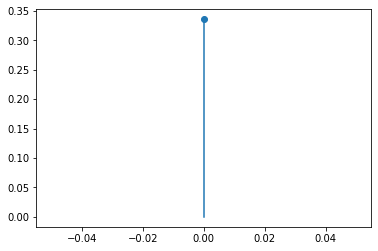

In [ ]:
from matplotlib import pyplot as plt

plt.stem(history.history['loss'])
plt.show()

#06-Full model

In [ ]:
df = pd.read_feather('train_normalized_data.fth')
df_test = pd.read_feather('test_normalized_data.fth')

In [ ]:
cat_vars = ['Store', 'DayOfWeek', 'Year', 'Month', 'Day', 'StateHoliday', 'CompetitionMonthsOpen', 'Promo2Weeks', 
            'StoreType', 'Assortment', 'PromoInterval', 'CompetitionOpenSinceYear', 'Promo2SinceYear', 'State', 
            'Week', 'Events','Promo', 'SchoolHoliday', 'StateHoliday_bool', 'Promo_fw', 'Promo_bw', 'StateHoliday_bool_fw', 'StateHoliday_bool_bw', 'SchoolHoliday_fw', 'SchoolHoliday_bw']

#cat_vars = ['Store', 'DayOfWeek']

In [ ]:
contin_vars = ['CompetitionDistance', 
   'Max_TemperatureC', 'Mean_TemperatureC', 'Min_TemperatureC', 'Precipitationmm',
   'Max_Humidity', 'Mean_Humidity', 'Min_Humidity', 'Max_Wind_SpeedKm_h', 
   'Mean_Wind_SpeedKm_h', 'CloudCover', 'trend', 'trend_DE',
   'AfterStateHoliday_bool', 'BeforeStateHoliday_bool'']
#contin_vars = ['BeforeStateHoliday_bool', 'Max_TemperatureC']

In [ ]:
uniques = DataFrameSummary(df[cat_vars]).summary().loc[['uniques']]

In [ ]:
uniques.T

,uniques
Store,1115
DayOfWeek,7
Year,3
Month,12
Day,31
StateHoliday,4
CompetitionMonthsOpen,25
Promo2Weeks,26
StoreType,4
Assortment,3


## Asignación de dimensión de embeddings

In [ ]:
cat_var_dict = {'Store': 50, 'DayOfWeek': 2, 'Year': 2, 'Month': 2,
'Day': 10, 'StateHoliday': 2, 'CompetitionMonthsOpen': 2,
'Promo2Weeks': 1, 'StoreType': 2, 'Assortment': 3, 'PromoInterval': 3,
'CompetitionOpenSinceYear': 4, 'Promo2SinceYear': 4, 'State': 6,
'Promo':1, 'SchoolHoliday':1, 'StateHoliday_bool':1,
'Week': 25, 'Events': 4, 'Promo_fw': 1,
'Promo_bw': 1, 'StateHoliday_bool_fw': 1,
'StateHoliday_bool_bw': 1, 'SchoolHoliday_fw': 1,
'SchoolHoliday_bw': 1}

In [ ]:
for v in cat_vars:
    uniques_ = df[v].unique()
    uniques_.sort()
    print(v, cat_var_dict[v], len(uniques_), uniques_)
    print()

Store 50 1115 [   0    1    2 ... 1112 1113 1114]

DayOfWeek 2 7 [0 1 2 3 4 5 6]

Year 2 3 [0 1 2]

Month 2 12 [ 0  1  2  3  4  5  6  7  8  9 10 11]

Day 10 31 [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30]

StateHoliday 2 4 [0 1 2 3]

CompetitionMonthsOpen 2 25 [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24]

Promo2Weeks 1 26 [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25]

StoreType 2 4 [0 1 2 3]

Assortment 3 3 [0 1 2]

PromoInterval 3 4 [0 1 2 3]

CompetitionOpenSinceYear 4 21 [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20]

Promo2SinceYear 4 8 [0 1 2 3 4 5 6 7]

State 6 12 [ 0  1  2  3  4  5  6  7  8  9 10 11]

Week 25 52 [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51]

Events 4 22 [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20

## Seleccion de variables

Para seleccionar que variables continuas son más influyentes sobre el modelo, graficamos cada una de ellas en función de las ventas

In [ ]:
from matplotlib.pyplot import figure

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.colors import Normalize 
from scipy.interpolate import interpn

def density_scatter( x , y, title, ax = None, sort = True, bins = 20, **kwargs )   :
    """
    Scatter plot colored by 2d histogram
    """
    if ax is None :
      fig , ax = plt.subplots()
    data , x_e, y_e = np.histogram2d( x, y, bins = bins, density = True )
    z = interpn( ( 0.5*(x_e[1:] + x_e[:-1]) , 0.5*(y_e[1:]+y_e[:-1]) ) , data , np.vstack([x,y]).T , method = "splinef2d", bounds_error = False)

    #To be sure to plot all data
    z[np.where(np.isnan(z))] = 0.0

    # Sort the points by density, so that the densest points are plotted last
    if sort :
      idx = z.argsort()
      x, y, z = x[idx], y[idx], z[idx]

    ax.scatter( x, y, c=z, **kwargs )

    norm = Normalize(vmin = np.min(z), vmax = np.max(z))
    cbar = fig.colorbar(cm.ScalarMappable(norm = norm), ax=ax)
    cbar.ax.set_ylabel('Density')
    cbar.ax.set_title(title)

    return ax

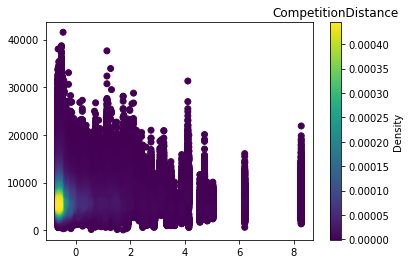

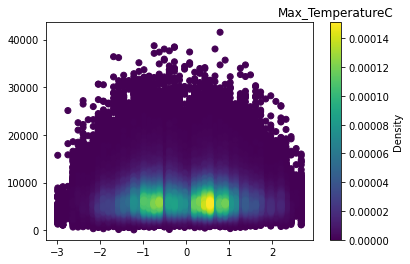

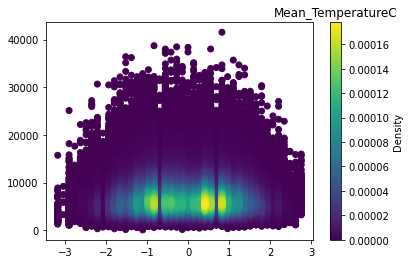

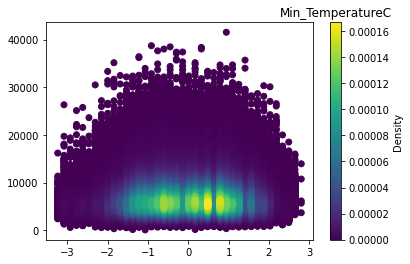

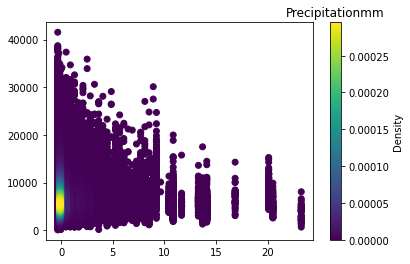

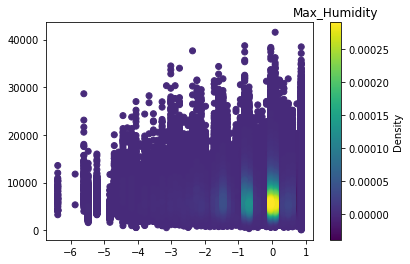

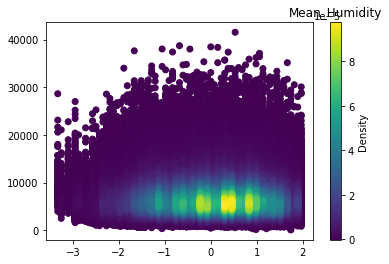

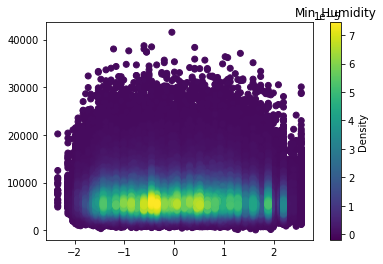

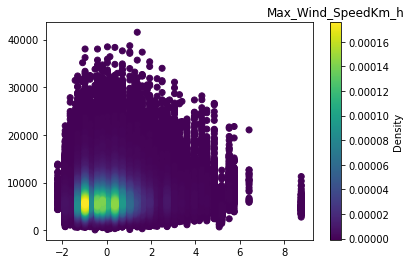

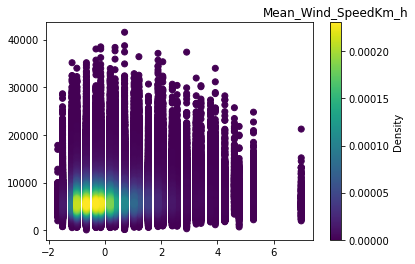

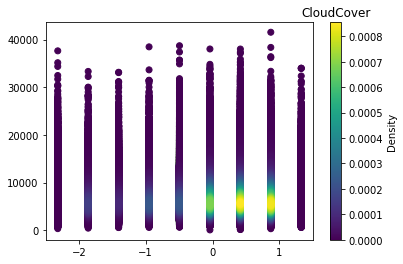

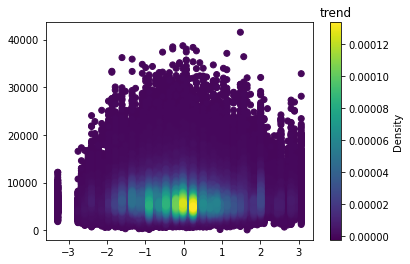

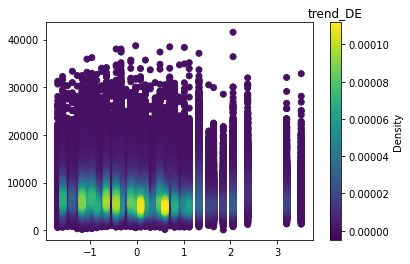

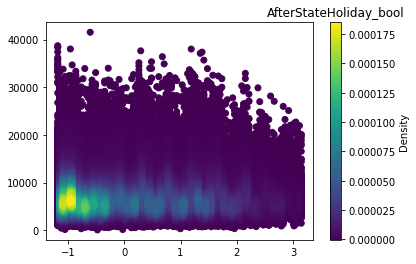

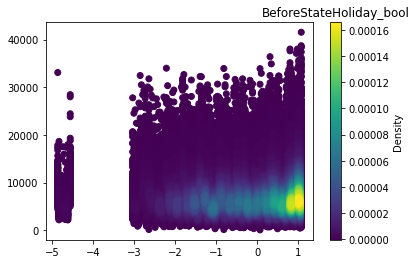

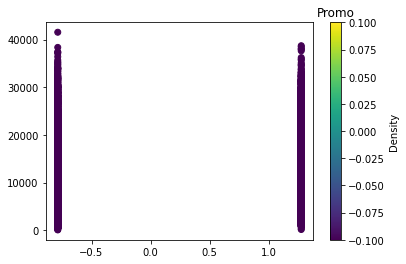

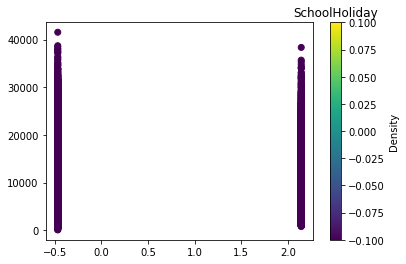

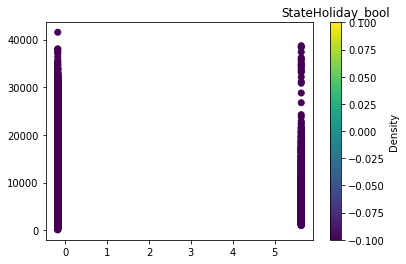

In [ ]:
for x_selec_name in contin_vars:
  y_selec = np.array(df_train['Sales'])
  x_selec = np.array(df_train[x_selec_name])
  density_scatter( x_selec , y_selec, x_selec_name, bins = [100,100])
  #a1 = figure(figsize=(8, 6), dpi=80)
  #a1.scatter(x_selec,y_selec)
  #a1.title(x_selec_name)


## Definición de modelo

En primer lugar entrenamos el modelo con todas las variables continuas y categóricas, y con las ventas como único output

In [ ]:
add_customers = False
log_output = False
output_activation = 'linear'

In [ ]:
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Embedding, Input, Flatten, Concatenate, Dense, BatchNormalization, Activation, LeakyReLU, Dropout
from tensorflow.keras.regularizers import l2

In [ ]:
def get_cat_vars_model(cat_vars, uniques, cat_var_dict):
    cat_vars_embed_outs = []
    cat_var_inputs = []
    for cat_var in cat_vars:
        cat_var_in = Input(shape=(1,), name=f"{cat_var}_input")
        cat_var_inputs.append(cat_var_in)
        embed_out = Embedding(uniques[cat_var][0], cat_var_dict[cat_var], name=f'{cat_var}_Embed')(cat_var_in)
        flatten_out = Flatten(name=f"{cat_var}_flat")(embed_out)
        cat_vars_embed_outs.append(flatten_out)
    return cat_var_inputs, cat_vars_embed_outs

def get_cont_vars_input(contin_vars, dense_layer=False):
    cont_vars_inputs = []
    cont_vars_outputs = []
    for cont_var in contin_vars:
        cont_var_in = Input(shape=(1,), name=f"{cont_var}_input")
        cont_vars_inputs.append(cont_var_in)
        if dense_layer:
            cont_var_out = Dense(1, name=f"{cont_var}_input", activation = 'linear')(cont_var_in)
            cont_vars_outputs.append(cont_var_out)
        else:
            cont_vars_outputs.append(cont_var_in)
    return cont_vars_inputs, cont_vars_outputs

In [ ]:
cat_var_inputs, cat_vars_embed_outs = get_cat_vars_model(cat_vars, uniques, cat_var_dict)
cont_vars_inputs,  cont_vars_outs= get_cont_vars_input(contin_vars)

In [ ]:
# Descomentar para ver resultados
# cat_vars_embed_outs
# cat_var_inputs
# cont_vars_inputs
# cont_vars_outs

In [ ]:
first_hidden_units = 1000
second_hidden_units = 500
l2_lambda = 1e-3
merged = Concatenate(name='All_Concatenate')(cat_vars_embed_outs + cont_vars_inputs)
x = Dense(first_hidden_units, kernel_initializer="uniform", kernel_regularizer=l2(l2_lambda))(merged)
# x = BatchNormalization()(x)
x = Activation('relu')(x)
# x = LeakyReLU()(x)
x = Dense(second_hidden_units, kernel_initializer="uniform", kernel_regularizer=l2(l2_lambda))(x)
# x = BatchNormalization()(x)
x = Activation('relu')(x)
# x = LeakyReLU()(x)

output_1 = Dense(1, name='Sales', activation=output_activation)(x)
output_2 = Dense(1, name='Customers', activation=output_activation)(x)

In [ ]:
if add_customers:
    model = Model(cat_var_inputs + cont_vars_inputs, [output_1, output_2])
else: 
    model = Model(cat_var_inputs + cont_vars_inputs, [output_1])

In [ ]:
# Descomentar para ver
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
Store_input (InputLayer)        [(None, 1)]          0                                            
__________________________________________________________________________________________________
DayOfWeek_input (InputLayer)    [(None, 1)]          0                                            
__________________________________________________________________________________________________
Year_input (InputLayer)         [(None, 1)]          0                                            
__________________________________________________________________________________________________
Month_input (InputLayer)        [(None, 1)]          0                                            
____________________________________________________________________________________________

In [ ]:
model.save_weights('initial_weights.hdf5')

In [ ]:
df_train = df[df.Date < datetime.datetime(2015, 7, 1)]  
df_val = df[df.Date >= datetime.datetime(2015, 7, 1)]
print(f'Cantidad en val: {len(df_val)}, porcentaje: {len(df_train)/(len(df_train) + len(df_val))}')

Cantidad en val: 30188, porcentaje: 0.9642465458145908


In [ ]:
from matplotlib import pyplot as plt
# plt.figure(figsize=(20,5))
# plt.plot((df_train[df_train['Store']==1]['Sales'].values - df_train[df_train['Store']==1]['Sales'].mean())/df_train[df_train['Store']==1]['Sales'].std())
# plt.show()
# plt.figure(figsize=(20,5))
# plt.plot(np.log(df_train[df_train['Store']==1]['Sales'].values)/np.max(np.log(df_train[df_train['Store']==1]['Sales'].values)))
# plt.show()

In [ ]:
stores_mean = {}
for store, g_df in df_train.groupby('Store'):
    stores_mean[store] = g_df[g_df['Sales'] > 0]['Sales'].mean()

In [ ]:
df_train.loc[:, 'mean_by_store'] = df_train['Store'].apply(stores_mean.get)
df_val.loc[:, 'mean_by_store'] = df_val['Store'].apply(stores_mean.get)

df_train.loc[:, 'Sales_store'] = df_train['Sales'] - df_train['mean_by_store']
df_val.loc[:, 'Sales_store'] = df_val['Sales'] - df_val['mean_by_store']

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1596: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1743: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)


In [ ]:
from tensorflow.keras import backend as K

In [ ]:
def rmspe(y_true, y_pred):
    return K.sqrt(K.mean(K.square((y_true - y_pred)/y_true)))

In [ ]:
def get_metric(df, sales_):
    return np.sqrt((((df['Sales'] - sales_)/df['Sales'])**2).mean())

In [ ]:
get_metric(df_val, df_val['mean_by_store'])

0.30717460853388645

In [ ]:
all_vars = cat_vars + contin_vars
X_train = np.hsplit(df_train[all_vars].values, len(all_vars))
X_val = np.hsplit(df_val[all_vars].values, len(all_vars))
X_test = np.hsplit(df_test[all_vars].values, len(all_vars))

In [ ]:
df_train[all_vars]

,Store,DayOfWeek,Year,Month,Day,StateHoliday,CompetitionMonthsOpen,Promo2Weeks,StoreType,Assortment,PromoInterval,CompetitionOpenSinceYear,Promo2SinceYear,State,Week,Events,Promo,SchoolHoliday,StateHoliday_bool,Promo_fw,Promo_bw,StateHoliday_bool_fw,StateHoliday_bool_bw,SchoolHoliday_fw,SchoolHoliday_bw,CompetitionDistance,Max_TemperatureC,Mean_TemperatureC,Min_TemperatureC,Precipitationmm,Max_Humidity,Mean_Humidity,Min_Humidity,Max_Wind_SpeedKm_h,Mean_Wind_SpeedKm_h,CloudCover,trend,trend_DE,AfterStateHoliday_bool,BeforeStateHoliday_bool
30188,0,1,2,5,29,0,24,25,2,0,0,13,0,4,26,20,1,0,0,4,2,0,0,0,0,-0.511043,1.733265,1.509328,1.099074,-0.315778,-0.166351,-2.192275,-1.932272,0.036585,-0.317234,-2.314268,0.950700,0.807334,-0.349784,1.072424
30189,1,1,2,5,29,0,24,25,0,0,2,12,2,11,26,20,1,0,0,4,2,0,0,0,0,-0.593412,1.378855,1.233050,0.944269,-0.315778,-0.684665,-1.283627,-1.117041,-1.081931,-0.656379,-0.493858,0.950700,0.807334,-0.029087,1.072424
30190,2,1,2,5,29,0,24,25,0,0,2,11,3,6,26,0,1,1,0,4,2,0,0,5,2,1.002195,1.733265,1.371189,0.944269,-0.315778,0.092806,-1.359348,-1.422752,-0.410822,-1.165096,-1.859165,1.479808,0.807334,-0.349784,1.072424
30191,3,1,2,5,29,0,24,25,2,2,0,14,0,0,26,20,1,0,0,4,2,0,0,0,0,-0.587528,1.260719,1.509328,1.718295,-0.315778,-1.462136,-1.737951,-1.422752,-0.187118,-0.317234,-0.493858,-0.019329,0.807334,-0.029087,1.072424
30192,4,1,2,5,29,0,2,25,0,0,0,20,0,9,26,20,1,0,0,4,2,0,0,0,0,2.859029,1.378855,1.509328,1.408685,-0.315778,-0.684665,-1.132186,-1.066089,-0.970080,-0.317234,-0.038755,-0.460252,0.807334,-0.349784,1.072424
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
844333,681,1,0,0,0,1,24,25,1,0,0,11,0,0,0,10,0,1,1,1,0,1,1,4,1,-0.642833,-0.747604,-0.424620,-0.139368,-0.012096,0.870277,0.306506,0.615325,0.372140,1.039345,0.416347,0.421593,-0.440285,-1.183596,1.072424
844334,732,1,0,0,0,1,24,25,1,1,0,4,0,6,0,10,0,1,1,1,0,1,1,4,1,-0.559288,-0.747604,-0.839037,-0.603784,1.714099,0.092806,0.987991,0.768180,1.826211,2.395924,0.416347,-0.195698,-0.440285,-1.183596,1.072424
844335,768,1,0,0,0,1,24,5,1,1,2,0,4,6,0,10,0,1,1,1,0,1,1,4,1,-0.561641,-0.747604,-0.839037,-0.603784,1.714099,0.092806,0.987991,0.768180,1.826211,2.395924,0.416347,-0.195698,-0.440285,-1.183596,1.072424
844336,947,1,0,0,0,1,24,25,1,1,0,0,0,1,0,1,0,1,1,1,0,2,1,4,1,-0.492216,-0.747604,-0.977176,-1.223006,-0.215883,-0.036773,0.457947,0.054854,0.036585,-0.995523,0.416347,-0.548436,-0.440285,-1.183596,1.072424


In [ ]:
df_train

,index,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,Year,Month,Week,Day,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,CompetitionOpenSince,Promo2Since,State,file,week,trend,Date_y,Month_y,Day_y,file_DE,week_DE,trend_DE,Date_DE,State_DE,Month_DE,Day_DE,file_y,...,MeanDew_PointC,Min_DewpointC,Max_Humidity,Mean_Humidity,Min_Humidity,Max_Sea_Level_PressurehPa,Mean_Sea_Level_PressurehPa,Min_Sea_Level_PressurehPa,Max_VisibilityKm,Mean_VisibilityKm,Min_VisibilitykM,Max_Wind_SpeedKm_h,Mean_Wind_SpeedKm_h,Max_Gust_SpeedKm_h,Precipitationmm,CloudCover,Events,WindDirDegrees,Year_y,Week_y,StateName,CompetitionDaysOpen,CompetitionMonthsOpen,Promo2Days,Promo2Weeks,StateHoliday_bool,AfterSchoolHoliday,BeforeSchoolHoliday,AfterStateHoliday_bool,BeforeStateHoliday_bool,AfterPromo,BeforePromo,SchoolHoliday_bw,StateHoliday_bool_bw,Promo_bw,SchoolHoliday_fw,StateHoliday_bool_fw,Promo_fw,mean_by_store,Sales_store
30188,34565,0,1,2015-06-30,5735,568,1,1,0,0,2,5,26,29,2,0,-0.511043,9,13,0,1,0,0,2008-09-15,1990-01-01,4,Rossmann_DE_HE,2015-07-05 - 2015-07-11,0.950700,2015-07-05,7,5,Rossmann_DE,2015-07-05 - 2015-07-11,0.807334,2015-07-05,None,7,5,Hessen,...,9,4,-0.166351,-2.192275,-1.932272,1022,1021,1018,31.0,31.0,31.0,0.036585,-0.317234,21.0,-0.315778,-2.314268,20,33,2015,27,Hessen,2479,24,9311,25,0,81,-27,-0.349784,1.072424,0,0,0,0,2,0,0,4,4768.684350,966.315650
30189,34566,1,1,2015-06-30,9863,877,1,1,0,0,2,5,26,29,0,0,-0.593412,11,12,1,13,2,2,2007-11-15,2010-03-29,11,Rossmann_DE_TH,2015-07-05 - 2015-07-11,0.950700,2015-07-05,7,5,Rossmann_DE,2015-07-05 - 2015-07-11,0.807334,2015-07-05,None,7,5,Thueringen,...,11,9,-0.684665,-1.283627,-1.117041,1023,1022,1020,10.0,10.0,10.0,-1.081931,-0.656379,21.0,-0.315778,-0.493858,20,48,2015,27,Thueringen,2784,24,1919,25,0,46,-13,-0.029087,1.072424,0,0,0,0,2,0,0,4,4953.887715,4909.112285
30190,34567,2,1,2015-06-30,13261,1072,1,1,0,1,2,5,26,29,0,0,1.002195,12,11,1,14,3,2,2006-12-15,2011-04-04,6,Rossmann_DE_NW,2015-07-05 - 2015-07-11,1.479808,2015-07-05,7,5,Rossmann_DE,2015-07-05 - 2015-07-11,0.807334,2015-07-05,None,7,5,NordrheinWestfalen,...,12,9,0.092806,-1.359348,-1.422752,1023,1021,1019,31.0,21.0,10.0,-0.410822,-1.165096,21.0,-0.315778,-1.859165,0,42,2015,27,NordrheinWestfalen,3119,24,1548,25,0,0,0,-0.349784,1.072424,0,0,2,0,2,5,0,4,6947.773936,6313.226064
30191,34568,3,1,2015-06-30,13106,1488,1,1,0,0,2,5,26,29,2,2,-0.587528,9,14,0,1,0,0,2009-09-15,1990-01-01,0,Rossmann_DE_BE,2015-07-05 - 2015-07-11,-0.019329,2015-07-05,7,5,Rossmann_DE,2015-07-05 - 2015-07-11,0.807334,2015-07-05,None,7,5,Berlin,...,11,7,-1.462136,-1.737951,-1.422752,1023,1021,1020,31.0,17.0,10.0,-0.187118,-0.317234,35.0,-0.315778,-0.493858,20,343,2015,27,Berlin,2114,24,9311,25,0,35,-16,-0.029087,1.072424,0,0,0,0,2,0,0,4,9616.343461,3489.656539
30192,34569,4,1,2015-06-30,6635,645,1,1,0,0,2,5,26,29,0,0,2.859029,4,20,0,1,0,0,2015-04-15,1990-01-01,9,Rossmann_DE_SN,2015-07-05 - 2015-07-11,-0.460252,2015-07-05,7,5,Rossmann_DE,2015-07-05 - 2015-07-11,0.807334,2015-07-05,None,7,5,Sachsen,...,12,9,-0.684665,-1.132186,-1.066089,1022,1021,1020,31.0,19.0,10.0,-0.970080,-0.317234,21.0,-0.315778,-0.038755,20,313,2015,27,Sachsen,76,2,9311,25,0,46,-13,-0.349784,1.072424,0,0,0,0,2,0,0,4,4679.026596,1955.973404
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
844333,1016776,681,1,2013-01-01,3375,566,1,0,1,1,0,0,0,0,1,0,-0.642833,9,11,0,1,0,0,2006-09-15,1990-01-01,0,Rossmann_DE_BE,2013-01-06 - 2013-01-12,0.421593,2013-01-06,1,6,Rossmann_DE,2013-01-06 - 2013-01-12,-0.440285,2013-01-06,None,1,6,Berlin,...,3,2,0.870277,0.306506,0.615325,1009,1004,1003,31.0,14.0,10.0

In [ ]:
X_train

In [ ]:
if add_customers:
    y_out_columns = ['Sales', 'Customers']
else:
    y_out_columns = ['Sales_store']
    
if log_output:
    # Escala logaritmica
    max_log_y = np.max(np.log(df[y_out_columns])).values
    y_train = np.log(df_train[y_out_columns].values)/max_log_y
    y_val = np.log(df_val[y_out_columns].values)/max_log_y
else:
    # Normalización
#     y_mean = df_train[y_out_columns].mean().values
#     y_std = df_train[y_out_columns].std().values
#     y_train = (df_train[y_out_columns].values - y_mean)/y_std
#     y_val = (df_val[y_out_columns].values - y_mean)/y_std
    y_max = df_train[y_out_columns].max().values
    y_train = df_train[y_out_columns].values/y_max
    y_val = df_val[y_out_columns].values/y_max
y_train = np.hsplit(y_train, y_train.shape[1])
y_val = np.hsplit(y_val, y_val.shape[1])

In [ ]:
lr = 0.001
model.compile(optimizer=Adam(lr=lr), metrics=['mse', rmspe], loss='mse')

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [ ]:
if add_customers:
    checkpoint = ModelCheckpoint('bestmodel.hdf5', monitor='val_Sales_mse', verbose=1, save_best_only=True)
else:
    checkpoint = ModelCheckpoint('bestmodel.hdf5', monitor='val_loss', verbose=1, save_best_only=True)

In [ ]:
epochs = 40
batch_size = 256
history = model.fit(X_train, y_train, validation_data=(X_val, y_val),  epochs=epochs, batch_size=batch_size, callbacks=[checkpoint], verbose=2)

Epoch 1/40
3181/3181 - 85s - loss: 9.0643e-04 - mse: 8.1566e-04 - rmspe: 26.5807 - val_loss: 0.0011 - val_mse: 9.8706e-04 - val_rmspe: 52.8173

Epoch 00001: val_loss did not improve from 0.00107
Epoch 2/40
3181/3181 - 87s - loss: 9.0800e-04 - mse: 8.1699e-04 - rmspe: 25.8474 - val_loss: 0.0012 - val_mse: 0.0011 - val_rmspe: 42.0798

Epoch 00002: val_loss did not improve from 0.00107
Epoch 3/40
3181/3181 - 86s - loss: 9.0627e-04 - mse: 8.1587e-04 - rmspe: 28.0651 - val_loss: 0.0012 - val_mse: 0.0011 - val_rmspe: 55.0573

Epoch 00003: val_loss did not improve from 0.00107
Epoch 4/40
3181/3181 - 85s - loss: 9.0251e-04 - mse: 8.1229e-04 - rmspe: 26.5447 - val_loss: 0.0011 - val_mse: 0.0010 - val_rmspe: 45.6883

Epoch 00004: val_loss did not improve from 0.00107
Epoch 5/40
3181/3181 - 85s - loss: 9.0282e-04 - mse: 8.1319e-04 - rmspe: 29.6001 - val_loss: 0.0012 - val_mse: 0.0011 - val_rmspe: 72.7643

Epoch 00005: val_loss did not improve from 0.00107
Epoch 6/40
3181/3181 - 85s - loss: 9.0122

In [ ]:
model.save('/content/drive/MyDrive/Redes TPS/TP2/data/modelo1.h5')

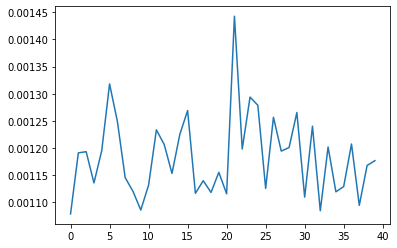

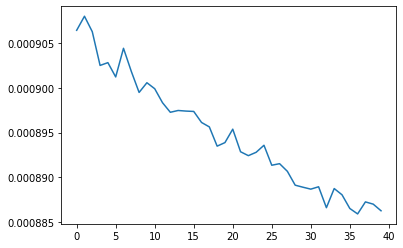

In [ ]:
plt.plot(history.history['val_loss'])
# plt.plot(history.history['val_Customers_mse'])
# plt.plot(history.history['val_Sales_mse'])
plt.show()
plt.plot(history.history['loss'])
# plt.plot(history.history['Customers_mse'])
# plt.plot(history.history['Sales_mse'])

## Métrica

$$
\textrm{RMSE} = \sqrt{\frac{1}{n} \sum_{i=1}^{n} \left(\frac{\hat{y}_i - y_i}{y_i}\right)^2}
$$

In [ ]:
model.evaluate(X_val, y_val)

944/944 [==============================] - 4s 5ms/step - loss: 0.0012 - mse: 0.0011 - rmspe: 26.3739


[0.0011765897506847978, 0.0010949380230158567, 26.37386703491211]

In [ ]:
model.load_weights('bestmodel.hdf5')
model.evaluate(X_val, y_val)

944/944 [==============================] - 4s 4ms/step - loss: 0.0011 - mse: 9.8102e-04 - rmspe: 25.8699


[0.0010714521631598473, 0.0009810205083340406, 25.869930267333984]

In [ ]:
# model.load_weights('bestmodel.hdf5')
# model.evaluate(X_val, y_val)
# 30188/30188 [==============================] - 5s 172us/step
# [0.12197033089921382,
#  0.07211007360268763,
#  0.037183713050426136,
#  0.07211007360268763,
#  0.037183713050426136]

# [0.12932546436786652,
#  0.07751645147800446,
#  0.039259567856788635,
#  0.07751645147800446,
#  0.039259567856788635]

In [ ]:
if log_output:
    if add_customers:
        y_pred = np.exp(model.predict(X_val, verbose=1)[0][:, 0]*max_log_y[0])
        y_pred_test = np.exp(model.predict(X_test, verbose=1)[0][:, 0]*max_log_y[0])
    else:
        y_pred = np.exp(model.predict(X_val, verbose=1)*max_log_y)[:,0]
        y_pred_test = np.exp(model.predict(X_test, verbose=1)*max_log_y)[:,0]
else:
    if add_customers:
        y_pred = (model.predict(X_val, verbose=1)[0]*y_std[0] + y_mean[0])[:,0]
        y_pred_test = (model.predict(X_test, verbose=1)[0]*y_std[0] + y_mean[0])[:,0]
    else:
#         y_pred = model.predict(X_val, verbose=1)[:,0]*y_std + y_mean
#         y_pred_test = model.predict(X_test, verbose=1)[:,0]*y_std + y_mean
        y_pred = model.predict(X_val, verbose=1)[:,0]*y_max
        y_pred_test = model.predict(X_test, verbose=1)[:,0]*y_max
y_pred_test[df_test['Open'] == 0] = 0

1284/1284 [==============================] - 10s 8ms/step


In [ ]:
np.sqrt((((df_val['Sales'].values - y_pred)/df_val['Sales'].values)**2).sum()/len(y_pred))

1.051462940546149

In [ ]:
y_pred_test[:10]

array([-208.09056551,  273.85861137,  332.64529397,  906.57725661,
        692.06385991,  280.95384565, -327.95251909,  165.05423454,
       -285.03282243,  242.43021448])

##Prueba Con regularización (agregando customers al output)

Entrenamos el modelo con dos outputs: ventas (el que queremos predecir) y customers, que se agrega como método de regularización.

Model: "model_3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
Store_input (InputLayer)        [(None, 1)]          0                                            
__________________________________________________________________________________________________
DayOfWeek_input (InputLayer)    [(None, 1)]          0                                            
__________________________________________________________________________________________________
Year_input (InputLayer)         [(None, 1)]          0                                            
__________________________________________________________________________________________________
Month_input (InputLayer)        [(None, 1)]          0                                            
____________________________________________________________________________________________

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1596: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1743: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)
/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instea

Epoch 1/40
3181/3181 - 113s - loss: 0.0107 - Sales_loss: 0.0014 - Customers_loss: 5.7467e-04 - Sales_mse: 0.0014 - Sales_rmspe: 0.2745 - Customers_mse: 5.7467e-04 - Customers_rmspe: 0.2675 - val_loss: 0.0015 - val_Sales_loss: 8.3317e-04 - val_Customers_loss: 3.3112e-04 - val_Sales_mse: 8.3317e-04 - val_Sales_rmspe: 0.1906 - val_Customers_mse: 3.3112e-04 - val_Customers_rmspe: 0.2025

Epoch 00001: val_Sales_mse improved from inf to 0.00083, saving model to bestmodel.hdf5
Epoch 2/40
3181/3181 - 108s - loss: 0.0014 - Sales_loss: 8.5381e-04 - Customers_loss: 3.0810e-04 - Sales_mse: 8.5381e-04 - Sales_rmspe: 0.2295 - Customers_mse: 3.0810e-04 - Customers_rmspe: 0.2181 - val_loss: 0.0012 - val_Sales_loss: 7.0928e-04 - val_Customers_loss: 2.6803e-04 - val_Sales_mse: 7.0928e-04 - val_Sales_rmspe: 0.1701 - val_Customers_mse: 2.6803e-04 - val_Customers_rmspe: 0.1639

Epoch 00002: val_Sales_mse improved from 0.00083 to 0.00071, saving model to bestmodel.hdf5
Epoch 3/40
3181/3181 - 106s - loss: 0.

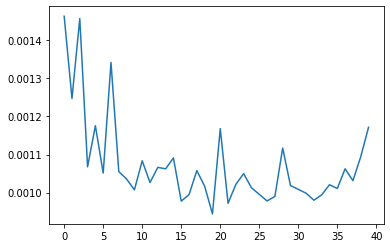

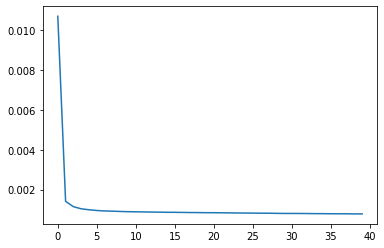

In [ ]:
## Definición de modelo

add_customers = True
log_output = False
output_activation = 'linear'

from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Embedding, Input, Flatten, Concatenate, Dense, BatchNormalization, Activation, LeakyReLU, Dropout
from tensorflow.keras.regularizers import l2

def get_cat_vars_model(cat_vars, uniques, cat_var_dict):
    cat_vars_embed_outs = []
    cat_var_inputs = []
    for cat_var in cat_vars:
        cat_var_in = Input(shape=(1,), name=f"{cat_var}_input")
        cat_var_inputs.append(cat_var_in)
        embed_out = Embedding(uniques[cat_var][0], cat_var_dict[cat_var], name=f'{cat_var}_Embed')(cat_var_in)
        flatten_out = Flatten(name=f"{cat_var}_flat")(embed_out)
        cat_vars_embed_outs.append(flatten_out)
    return cat_var_inputs, cat_vars_embed_outs

def get_cont_vars_input(contin_vars, dense_layer=False):
    cont_vars_inputs = []
    cont_vars_outputs = []
    for cont_var in contin_vars:
        cont_var_in = Input(shape=(1,), name=f"{cont_var}_input")
        cont_vars_inputs.append(cont_var_in)
        if dense_layer:
            cont_var_out = Dense(1, name=f"{cont_var}_input", activation = 'linear')(cont_var_in)
            cont_vars_outputs.append(cont_var_out)
        else:
            cont_vars_outputs.append(cont_var_in)
    return cont_vars_inputs, cont_vars_outputs

cat_var_inputs, cat_vars_embed_outs = get_cat_vars_model(cat_vars, uniques, cat_var_dict)
cont_vars_inputs,  cont_vars_outs= get_cont_vars_input(contin_vars)

# Descomentar para ver resultados
# cat_vars_embed_outs
# cat_var_inputs
# cont_vars_inputs
# cont_vars_outs

first_hidden_units = 1000
second_hidden_units = 500
l2_lambda = 1e-3
merged = Concatenate(name='All_Concatenate')(cat_vars_embed_outs + cont_vars_inputs)
x = Dense(first_hidden_units, kernel_initializer="uniform", kernel_regularizer=l2(l2_lambda))(merged)
# x = BatchNormalization()(x)
x = Activation('relu')(x)
# x = LeakyReLU()(x)
x = Dense(second_hidden_units, kernel_initializer="uniform", kernel_regularizer=l2(l2_lambda))(x)
# x = BatchNormalization()(x)
x = Activation('relu')(x)
# x = LeakyReLU()(x)

output_1 = Dense(1, name='Sales', activation=output_activation)(x)
output_2 = Dense(1, name='Customers', activation=output_activation)(x)

if add_customers:
    model = Model(cat_var_inputs + cont_vars_inputs, [output_1, output_2])
else: 
    model = Model(cat_var_inputs + cont_vars_inputs, [output_1])

# Descomentar para ver
model.summary()

model.save_weights('initial_weights.hdf5')

df_train = df[df.Date < datetime.datetime(2015, 7, 1)]  
df_val = df[df.Date >= datetime.datetime(2015, 7, 1)]
print(f'Cantidad en val: {len(df_val)}, porcentaje: {len(df_train)/(len(df_train) + len(df_val))}')

from matplotlib import pyplot as plt
# plt.figure(figsize=(20,5))
# plt.plot((df_train[df_train['Store']==1]['Sales'].values - df_train[df_train['Store']==1]['Sales'].mean())/df_train[df_train['Store']==1]['Sales'].std())
# plt.show()
# plt.figure(figsize=(20,5))
# plt.plot(np.log(df_train[df_train['Store']==1]['Sales'].values)/np.max(np.log(df_train[df_train['Store']==1]['Sales'].values)))
# plt.show()

stores_mean = {}
for store, g_df in df_train.groupby('Store'):
    stores_mean[store] = g_df[g_df['Sales'] > 0]['Sales'].mean()

df_train.loc[:, 'mean_by_store'] = df_train['Store'].apply(stores_mean.get)
df_val.loc[:, 'mean_by_store'] = df_val['Store'].apply(stores_mean.get)

df_train.loc[:, 'Sales_store'] = df_train['Sales'] - df_train['mean_by_store']
df_val.loc[:, 'Sales_store'] = df_val['Sales'] - df_val['mean_by_store']

from tensorflow.keras import backend as K

def rmspe(y_true, y_pred):
    return K.sqrt(K.mean(K.square((y_true - y_pred)/y_true)))

def get_metric(df, sales_):
    return np.sqrt((((df['Sales'] - sales_)/df['Sales'])**2).mean())

get_metric(df_val, df_val['mean_by_store'])

all_vars = cat_vars + contin_vars
X_train = np.hsplit(df_train[all_vars].values, len(all_vars))
X_val = np.hsplit(df_val[all_vars].values, len(all_vars))
X_test = np.hsplit(df_test[all_vars].values, len(all_vars))

df_train[all_vars]

df_train

X_train

if add_customers:
    y_out_columns = ['Sales', 'Customers']
else:
    y_out_columns = ['Sales_store']
    
if log_output:
    # Escala logaritmica
    max_log_y = np.max(np.log(df[y_out_columns])).values
    y_train = np.log(df_train[y_out_columns].values)/max_log_y
    y_val = np.log(df_val[y_out_columns].values)/max_log_y
else:
    # Normalización
#     y_mean = df_train[y_out_columns].mean().values
#     y_std = df_train[y_out_columns].std().values
#     y_train = (df_train[y_out_columns].values - y_mean)/y_std
#     y_val = (df_val[y_out_columns].values - y_mean)/y_std
    y_max = df_train[y_out_columns].max().values
    y_train = df_train[y_out_columns].values/y_max
    y_val = df_val[y_out_columns].values/y_max
y_train = np.hsplit(y_train, y_train.shape[1])
y_val = np.hsplit(y_val, y_val.shape[1])

lr = 0.001
model.compile(optimizer=Adam(lr=lr), metrics=['mse', rmspe], loss='mse')

if add_customers:
    checkpoint = ModelCheckpoint('bestmodel.hdf5', monitor='val_Sales_mse', verbose=1, save_best_only=True)
else:
    checkpoint = ModelCheckpoint('bestmodel.hdf5', monitor='val_loss', verbose=1, save_best_only=True)

epochs = 40
batch_size = 256
history = model.fit(X_train, y_train, validation_data=(X_val, y_val),  epochs=epochs, batch_size=batch_size, callbacks=[checkpoint], verbose=2)

model.save('/content/drive/MyDrive/Redes TPS/TP2/data/modelo1.h5')

plt.plot(history.history['val_loss'])
# plt.plot(history.history['val_Customers_mse'])
# plt.plot(history.history['val_Sales_mse'])
plt.show()
plt.plot(history.history['loss'])
# plt.plot(history.history['Customers_mse'])
# plt.plot(history.history['Sales_mse'])





##Prueba con menos variables

Entrenamos el modelo manteniendo la regularización, pero utilizando menor cantidad de variables. LAs variables utilizadas para entrenar se seleccionaron a partir del análisis de los gráficos de la sección Selección de Variables

In [ ]:
cat_vars = ['Store', 'DayOfWeek', 'Month', 'CompetitionMonthsOpen', 'Promo2Weeks', 
            'StoreType', 'Assortment', 'PromoInterval', 'CompetitionOpenSinceYear', 'Promo2SinceYear', 'State', 'Events','Promo', 'Promo_fw', 'Promo_bw', 'StateHoliday_bool_fw', 'StateHoliday_bool_bw', 'SchoolHoliday_fw', 'SchoolHoliday_bw']

In [ ]:
contin_vars = ['CompetitionDistance', 'Mean_TemperatureC', 'Precipitationmm',
  'Mean_Humidity', 'Mean_Wind_SpeedKm_h', 'CloudCover', 'trend', 'trend_DE', 'BeforeStateHoliday_bool', 'BeforeSchoolHoliday']

In [ ]:
uniques = DataFrameSummary(df[cat_vars]).summary().loc[['uniques']]

In [ ]:
cat_var_dict = {'Store': 50, 'DayOfWeek': 2,  'Month': 2,
'CompetitionMonthsOpen': 2,
'Promo2Weeks': 1, 'StoreType': 2, 'Assortment': 3, 'PromoInterval': 3,
'CompetitionOpenSinceYear': 4, 'Promo2SinceYear': 4, 'State': 6,
'Promo':1, 'SchoolHoliday':1, 'StateHoliday_bool':1,
'Week': 25, 'Events': 4, 'Promo_fw': 1,
'Promo_bw': 1, 'StateHoliday_bool_fw': 1,
'StateHoliday_bool_bw': 1, 'SchoolHoliday_fw': 1,
'SchoolHoliday_bw': 1}

In [ ]:
for v in cat_vars:
    uniques_ = df[v].unique()
    uniques_.sort()
    print(v, cat_var_dict[v], len(uniques_), uniques_)
    print()

Store 50 1115 [   0    1    2 ... 1112 1113 1114]

DayOfWeek 2 7 [0 1 2 3 4 5 6]

Month 2 12 [ 0  1  2  3  4  5  6  7  8  9 10 11]

CompetitionMonthsOpen 2 25 [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24]

Promo2Weeks 1 26 [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25]

StoreType 2 4 [0 1 2 3]

Assortment 3 3 [0 1 2]

PromoInterval 3 4 [0 1 2 3]

CompetitionOpenSinceYear 4 21 [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20]

Promo2SinceYear 4 8 [0 1 2 3 4 5 6 7]

State 6 12 [ 0  1  2  3  4  5  6  7  8  9 10 11]

Events 4 22 [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21]

Promo 1 2 [0 1]

Promo_fw 1 6 [0 1 2 3 4 5]

Promo_bw 1 6 [0 1 2 3 4 5]

StateHoliday_bool_fw 1 3 [0 1 2]

StateHoliday_bool_bw 1 3 [0 1 2]

SchoolHoliday_fw 1 8 [0 1 2 3 4 5 6 7]

SchoolHoliday_bw 1 8 [0 1 2 3 4 5 6 7]



Model: "model_3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
Store_input (InputLayer)        [(None, 1)]          0                                            
__________________________________________________________________________________________________
DayOfWeek_input (InputLayer)    [(None, 1)]          0                                            
__________________________________________________________________________________________________
Month_input (InputLayer)        [(None, 1)]          0                                            
__________________________________________________________________________________________________
CompetitionMonthsOpen_input (In [(None, 1)]          0                                            
____________________________________________________________________________________________

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1596: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1743: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)
/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instea

Epoch 1/40
3181/3181 - 95s - loss: 0.0913 - Sales_loss: 0.0196 - Customers_loss: 0.0054 - Sales_mse: 0.0196 - Sales_rmspe: 0.3878 - Customers_mse: 0.0054 - Customers_rmspe: 0.4270 - val_loss: 0.0227 - val_Sales_loss: 9.7100e-04 - val_Customers_loss: 4.4184e-04 - val_Sales_mse: 9.7100e-04 - val_Sales_rmspe: 0.2126 - val_Customers_mse: 4.4184e-04 - val_Customers_rmspe: 0.2294

Epoch 00001: val_Sales_mse improved from inf to 0.00097, saving model to bestmodel.hdf5
Epoch 2/40
3181/3181 - 92s - loss: 0.0094 - Sales_loss: 0.0013 - Customers_loss: 5.4571e-04 - Sales_mse: 0.0013 - Sales_rmspe: 0.2791 - Customers_mse: 5.4571e-04 - Customers_rmspe: 0.2873 - val_loss: 0.0025 - val_Sales_loss: 9.0187e-04 - val_Customers_loss: 3.6242e-04 - val_Sales_mse: 9.0187e-04 - val_Sales_rmspe: 0.1914 - val_Customers_mse: 3.6242e-04 - val_Customers_rmspe: 0.1991

Epoch 00002: val_Sales_mse improved from 0.00097 to 0.00090, saving model to bestmodel.hdf5
Epoch 3/40
3181/3181 - 94s - loss: 0.0020 - Sales_loss: 

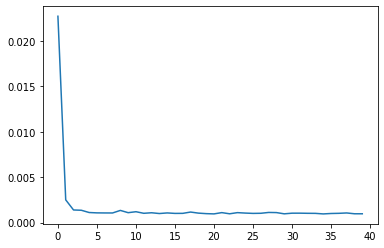

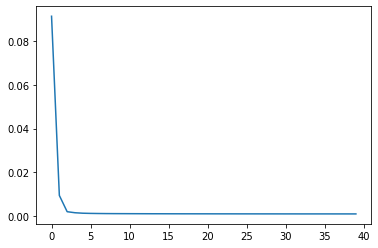

In [ ]:
## Definición de modelo

add_customers = True
log_output = False
output_activation = 'linear'


cat_var_inputs, cat_vars_embed_outs = get_cat_vars_model(cat_vars, uniques, cat_var_dict)
cont_vars_inputs,  cont_vars_outs= get_cont_vars_input(contin_vars)

# Descomentar para ver resultados
# cat_vars_embed_outs
# cat_var_inputs
# cont_vars_inputs
# cont_vars_outs

first_hidden_units = 1000
second_hidden_units = 500
l2_lambda = 1e-3
merged = Concatenate(name='All_Concatenate')(cat_vars_embed_outs + cont_vars_inputs)
x = Dense(first_hidden_units, kernel_initializer="uniform", kernel_regularizer=l2(l2_lambda))(merged)
# x = BatchNormalization()(x)
x = Activation('relu')(x)
# x = LeakyReLU()(x)
x = Dense(second_hidden_units, kernel_initializer="uniform", kernel_regularizer=l2(l2_lambda))(x)
# x = BatchNormalization()(x)
x = Activation('relu')(x)
# x = LeakyReLU()(x)

output_1 = Dense(1, name='Sales', activation=output_activation)(x)
output_2 = Dense(1, name='Customers', activation=output_activation)(x)

if add_customers:
    model = Model(cat_var_inputs + cont_vars_inputs, [output_1, output_2])
else: 
    model = Model(cat_var_inputs + cont_vars_inputs, [output_1])

# Descomentar para ver
model.summary()

model.save_weights('initial_weights.hdf5')

df_train = df[df.Date < datetime.datetime(2015, 7, 1)]  
df_val = df[df.Date >= datetime.datetime(2015, 7, 1)]
print(f'Cantidad en val: {len(df_val)}, porcentaje: {len(df_train)/(len(df_train) + len(df_val))}')

from matplotlib import pyplot as plt
# plt.figure(figsize=(20,5))
# plt.plot((df_train[df_train['Store']==1]['Sales'].values - df_train[df_train['Store']==1]['Sales'].mean())/df_train[df_train['Store']==1]['Sales'].std())
# plt.show()
# plt.figure(figsize=(20,5))
# plt.plot(np.log(df_train[df_train['Store']==1]['Sales'].values)/np.max(np.log(df_train[df_train['Store']==1]['Sales'].values)))
# plt.show()

stores_mean = {}
for store, g_df in df_train.groupby('Store'):
    stores_mean[store] = g_df[g_df['Sales'] > 0]['Sales'].mean()

df_train.loc[:, 'mean_by_store'] = df_train['Store'].apply(stores_mean.get)
df_val.loc[:, 'mean_by_store'] = df_val['Store'].apply(stores_mean.get)

df_train.loc[:, 'Sales_store'] = df_train['Sales'] - df_train['mean_by_store']
df_val.loc[:, 'Sales_store'] = df_val['Sales'] - df_val['mean_by_store']

from tensorflow.keras import backend as K

get_metric(df_val, df_val['mean_by_store'])

all_vars = cat_vars + contin_vars
X_train = np.hsplit(df_train[all_vars].values, len(all_vars))
X_val = np.hsplit(df_val[all_vars].values, len(all_vars))
X_test = np.hsplit(df_test[all_vars].values, len(all_vars))

df_train[all_vars]

df_train

X_train

if add_customers:
    y_out_columns = ['Sales', 'Customers']
else:
    y_out_columns = ['Sales_store']
    
if log_output:
    # Escala logaritmica
    max_log_y = np.max(np.log(df[y_out_columns])).values
    y_train = np.log(df_train[y_out_columns].values)/max_log_y
    y_val = np.log(df_val[y_out_columns].values)/max_log_y
else:
    # Normalización
#     y_mean = df_train[y_out_columns].mean().values
#     y_std = df_train[y_out_columns].std().values
#     y_train = (df_train[y_out_columns].values - y_mean)/y_std
#     y_val = (df_val[y_out_columns].values - y_mean)/y_std
    y_max = df_train[y_out_columns].max().values
    y_train = df_train[y_out_columns].values/y_max
    y_val = df_val[y_out_columns].values/y_max
y_train = np.hsplit(y_train, y_train.shape[1])
y_val = np.hsplit(y_val, y_val.shape[1])

lr = 0.001
model.compile(optimizer=Adam(lr=lr), metrics=['mse', rmspe], loss='mse')

if add_customers:
    checkpoint = ModelCheckpoint('bestmodel.hdf5', monitor='val_Sales_mse', verbose=1, save_best_only=True)
else:
    checkpoint = ModelCheckpoint('bestmodel.hdf5', monitor='val_loss', verbose=1, save_best_only=True)

epochs = 40
batch_size = 256
history = model.fit(X_train, y_train, validation_data=(X_val, y_val),  epochs=epochs, batch_size=batch_size, callbacks=[checkpoint], verbose=2)

model.save('/content/drive/MyDrive/Redes TPS/TP2/data/modelo1.h5')

plt.plot(history.history['val_loss'])
# plt.plot(history.history['val_Customers_mse'])
# plt.plot(history.history['val_Sales_mse'])
plt.show()
plt.plot(history.history['loss'])
# plt.plot(history.history['Customers_mse'])
# plt.plot(history.history['Sales_mse'])


Podemos ver que al elegir las variables de entrenamiento siguiendo un criterio lógico, la métrica mejora en el set de validación

###Métricas

In [ ]:
model.evaluate(X_val, y_val)

944/944 [==============================] - 5s 5ms/step - loss: 9.5270e-04 - Sales_loss: 6.3878e-04 - Customers_loss: 2.1537e-04 - Sales_mse: 6.3878e-04 - Sales_rmspe: 0.1420 - Customers_mse: 2.1537e-04 - Customers_rmspe: 0.1265


[0.000952698930632323,
 0.0006387754110619426,
 0.00021537196880672127,
 0.0006387754110619426,
 0.14197500050067902,
 0.00021537196880672127,
 0.12648771703243256]

In [ ]:
model.load_weights('bestmodel.hdf5')
model.evaluate(X_val, y_val)

944/944 [==============================] - 5s 5ms/step - loss: 9.5270e-04 - Sales_loss: 6.3878e-04 - Customers_loss: 2.1537e-04 - Sales_mse: 6.3878e-04 - Sales_rmspe: 0.1420 - Customers_mse: 2.1537e-04 - Customers_rmspe: 0.1265


[0.000952698930632323,
 0.0006387754110619426,
 0.00021537196880672127,
 0.0006387754110619426,
 0.14197500050067902,
 0.00021537196880672127,
 0.12648771703243256]

In [ ]:
y_max

array([41551,  7388])

In [ ]:
if log_output:
    if add_customers:
        y_pred = np.exp(model.predict(X_val, verbose=1)[0][:, 0]*max_log_y[0])
        y_pred_test = np.exp(model.predict(X_test, verbose=1)[0][:, 0]*max_log_y[0])
    else:
        y_pred = np.exp(model.predict(X_val, verbose=1)*max_log_y)[:,0]
        y_pred_test = np.exp(model.predict(X_test, verbose=1)*max_log_y)[:,0]
else:
    if add_customers:
        y_pred = (model.predict(X_val, verbose=1)[0]*y_max[0])[:,0]
        y_pred_test = (model.predict(X_test, verbose=1)[0]*y_max[0] )[:,0]
    else:
#         y_pred = model.predict(X_val, verbose=1)[:,0]*y_std + y_mean
#         y_pred_test = model.predict(X_test, verbose=1)[:,0]*y_std + y_mean
        y_pred = model.predict(X_val, verbose=1)[:,0]*y_max
        y_pred_test = model.predict(X_test, verbose=1)[:,0]*y_max
y_pred_test[df_test['Open'] == 0] = 0

1284/1284 [==============================] - 9s 7ms/step


In [ ]:
y_pred_test

array([ 4796.925 ,  7043.492 ,  9378.66  , ...,  6054.4873, 22338.816 ,
        6272.5415], dtype=float32)

## Baseline

In [ ]:
import pandas as pd
sample_csv = pd.read_csv(f"{PATH}/sample_submission.csv")

In [ ]:
sample_csv

,Id,Sales
0,1,0
1,2,0
2,3,0
3,4,0
4,5,0
...,...,...
41083,41084,0
41084,41085,0
41085,41086,0
41086,41087,0


In [ ]:
stores_mean = {}
for store, g_df in df.groupby('Store'):
    stores_mean[store] = g_df[g_df['Sales'] > 0]['Sales'].mean()

In [ ]:
df_test['Sales'] = df_test['Store'].apply(stores_mean.get)
df_test.loc[df_test['Open'] == 0, 'Sales'] = 0

In [ ]:
df_test[['Store', 'Sales']].head(10)

,Store,Sales
0,0,4759.096031
1,2,6942.568678
2,6,8817.050891
3,7,5539.358418
4,8,6562.337612
5,9,5568.420918
6,10,8030.977041
7,11,7589.598214
8,12,5034.747182
9,13,5508.567394


In [ ]:
df_test[df_test['Open'] == 0][['Store', 'Sales']].head()

,Store,Sales
543,702,0.0
676,878,0.0
840,1096,0.0
1399,702,0.0
1532,878,0.0


In [ ]:
sample_csv['Sales'] = df_test['Sales']

In [ ]:
sample_csv

,Id,Sales
0,1,4759.096031
1,2,6942.568678
2,3,8817.050891
3,4,5539.358418
4,5,6562.337612
...,...,...
41083,41084,5251.702182
41084,41085,10236.577664
41085,41086,6627.859694
41086,41087,20666.562500


In [ ]:
sample_csv.to_csv(f'submision_baseline.csv', index=False)

In [ ]:
sample_csv.head()

In [ ]:
PATH

'/content/drive/MyDrive/Redes TPS/TP2/data/'

## Sumbit a la competición

In [ ]:

#sample_csv = pd.read_csv('dataset/rossmann/sample_submission.csv')
#sample_csv['Sales'] = y_pred_test
#sample_csv.head()

sample_csv.to_csv(f'{PATH}/submision_{add_customers}-{log_output}-{output_activation}-{l2_lambda}-{first_hidden_units}-{epochs}-{batch_size}-{lr}.csv', index=False)


##Prueba con otras Variables

In [ ]:
cat_vars = ['Store', 'DayOfWeek', 'Month', 'Year', 'CompetitionMonthsOpen', 'Promo2Weeks', 
            'StoreType', 'Assortment', 'PromoInterval', 'CompetitionOpenSinceYear', 'State',
            'Events','Promo', 'Promo_fw', 'StateHoliday_bool_fw']

In [ ]:
contin_vars = ['CompetitionDistance', 'Mean_TemperatureC', 'Precipitationmm',
  'Mean_Humidity', 'Mean_Wind_SpeedKm_h', 'CloudCover', 'trend',
   'BeforeStateHoliday_bool', 'BeforeSchoolHoliday']

In [ ]:
uniques = DataFrameSummary(df[cat_vars]).summary().loc[['uniques']]

In [ ]:
cat_var_dict = {'Store': 50, 'DayOfWeek': 2,  'Month': 2,
'CompetitionMonthsOpen': 2,
'Promo2Weeks': 1, 'StoreType': 2, 'Assortment': 3, 'PromoInterval': 3,
'CompetitionOpenSinceYear': 4, 'Promo2SinceYear': 4, 'State': 6,
'Promo':1, 'SchoolHoliday':1, 'StateHoliday_bool':1,
'Week': 25, 'Events': 4, 'Promo_fw': 1,
'Promo_bw': 1, 'StateHoliday_bool_fw': 1,
'StateHoliday_bool_bw': 1, 'SchoolHoliday_fw': 1,
'SchoolHoliday_bw': 1}

In [ ]:
for v in cat_vars:
    uniques_ = df[v].unique()
    uniques_.sort()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
Store_input (InputLayer)        [(None, 1)]          0                                            
__________________________________________________________________________________________________
DayOfWeek_input (InputLayer)    [(None, 1)]          0                                            
__________________________________________________________________________________________________
Month_input (InputLayer)        [(None, 1)]          0                                            
__________________________________________________________________________________________________
Year_input (InputLayer)         [(None, 1)]          0                                            
____________________________________________________________________________________________

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1596: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1743: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)
/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instea

Epoch 1/30
3181/3181 - 87s - loss: 0.0824 - Sales_loss: 0.0065 - Customers_loss: 0.0134 - Sales_mse: 0.0065 - Sales_rmspe: 0.3808 - Customers_mse: 0.0134 - Customers_rmspe: 0.4631 - val_loss: 0.0195 - val_Sales_loss: 9.5490e-04 - val_Customers_loss: 3.9853e-04 - val_Sales_mse: 9.5490e-04 - val_Sales_rmspe: 0.1901 - val_Customers_mse: 3.9853e-04 - val_Customers_rmspe: 0.1904

Epoch 00001: val_Sales_mse improved from inf to 0.00095, saving model to bestmodel.hdf5
Epoch 2/30
3181/3181 - 84s - loss: 0.0082 - Sales_loss: 0.0013 - Customers_loss: 5.2715e-04 - Sales_mse: 0.0013 - Sales_rmspe: 0.2801 - Customers_mse: 5.2715e-04 - Customers_rmspe: 0.2828 - val_loss: 0.0023 - val_Sales_loss: 9.3184e-04 - val_Customers_loss: 3.9603e-04 - val_Sales_mse: 9.3184e-04 - val_Sales_rmspe: 0.2030 - val_Customers_mse: 3.9603e-04 - val_Customers_rmspe: 0.2161

Epoch 00002: val_Sales_mse improved from 0.00095 to 0.00093, saving model to bestmodel.hdf5
Epoch 3/30
3181/3181 - 83s - loss: 0.0018 - Sales_loss: 

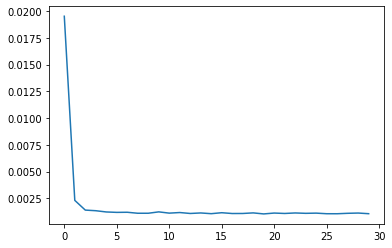

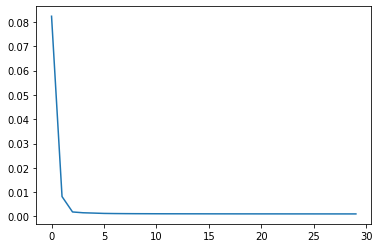

In [ ]:
## Definición de modelo

add_customers = True
log_output = False
output_activation = 'linear'


cat_var_inputs, cat_vars_embed_outs = get_cat_vars_model(cat_vars, uniques, cat_var_dict)
cont_vars_inputs,  cont_vars_outs= get_cont_vars_input(contin_vars)

# Descomentar para ver resultados
# cat_vars_embed_outs
# cat_var_inputs
# cont_vars_inputs
# cont_vars_outs

first_hidden_units = 1000
second_hidden_units = 500
l2_lambda = 1e-3
merged = Concatenate(name='All_Concatenate')(cat_vars_embed_outs + cont_vars_inputs)
x = Dense(first_hidden_units, kernel_initializer="uniform", kernel_regularizer=l2(l2_lambda))(merged)
# x = BatchNormalization()(x)
x = Activation('relu')(x)
# x = LeakyReLU()(x)
x = Dense(second_hidden_units, kernel_initializer="uniform", kernel_regularizer=l2(l2_lambda))(x)
# x = BatchNormalization()(x)
x = Activation('relu')(x)
# x = LeakyReLU()(x)

output_1 = Dense(1, name='Sales', activation=output_activation)(x)
output_2 = Dense(1, name='Customers', activation=output_activation)(x)

if add_customers:
    model = Model(cat_var_inputs + cont_vars_inputs, [output_1, output_2])
else: 
    model = Model(cat_var_inputs + cont_vars_inputs, [output_1])

# Descomentar para ver
model.summary()

model.save_weights('initial_weights.hdf5')

df_train = df[df.Date < datetime.datetime(2015, 7, 1)]  
df_val = df[df.Date >= datetime.datetime(2015, 7, 1)]
print(f'Cantidad en val: {len(df_val)}, porcentaje: {len(df_train)/(len(df_train) + len(df_val))}')

from matplotlib import pyplot as plt
# plt.figure(figsize=(20,5))
# plt.plot((df_train[df_train['Store']==1]['Sales'].values - df_train[df_train['Store']==1]['Sales'].mean())/df_train[df_train['Store']==1]['Sales'].std())
# plt.show()
# plt.figure(figsize=(20,5))
# plt.plot(np.log(df_train[df_train['Store']==1]['Sales'].values)/np.max(np.log(df_train[df_train['Store']==1]['Sales'].values)))
# plt.show()

stores_mean = {}
for store, g_df in df_train.groupby('Store'):
    stores_mean[store] = g_df[g_df['Sales'] > 0]['Sales'].mean()

df_train.loc[:, 'mean_by_store'] = df_train['Store'].apply(stores_mean.get)
df_val.loc[:, 'mean_by_store'] = df_val['Store'].apply(stores_mean.get)

df_train.loc[:, 'Sales_store'] = df_train['Sales'] - df_train['mean_by_store']
df_val.loc[:, 'Sales_store'] = df_val['Sales'] - df_val['mean_by_store']

from tensorflow.keras import backend as K

get_metric(df_val, df_val['mean_by_store'])

all_vars = cat_vars + contin_vars
X_train = np.hsplit(df_train[all_vars].values, len(all_vars))
X_val = np.hsplit(df_val[all_vars].values, len(all_vars))
X_test = np.hsplit(df_test[all_vars].values, len(all_vars))

df_train[all_vars]

df_train

X_train

if add_customers:
    y_out_columns = ['Sales', 'Customers']
else:
    y_out_columns = ['Sales_store']
    
if log_output:
    # Escala logaritmica
    max_log_y = np.max(np.log(df[y_out_columns])).values
    y_train = np.log(df_train[y_out_columns].values)/max_log_y
    y_val = np.log(df_val[y_out_columns].values)/max_log_y
else:
    # Normalización
#     y_mean = df_train[y_out_columns].mean().values
#     y_std = df_train[y_out_columns].std().values
#     y_train = (df_train[y_out_columns].values - y_mean)/y_std
#     y_val = (df_val[y_out_columns].values - y_mean)/y_std
    y_max = df_train[y_out_columns].max().values
    y_train = df_train[y_out_columns].values/y_max
    y_val = df_val[y_out_columns].values/y_max
y_train = np.hsplit(y_train, y_train.shape[1])
y_val = np.hsplit(y_val, y_val.shape[1])

lr = 0.001
model.compile(optimizer=Adam(lr=lr), metrics=['mse', rmspe], loss='mse')

if add_customers:
    checkpoint = ModelCheckpoint('bestmodel.hdf5', monitor='val_Sales_mse', verbose=1, save_best_only=True)
else:
    checkpoint = ModelCheckpoint('bestmodel.hdf5', monitor='val_loss', verbose=1, save_best_only=True)

epochs = 30
batch_size = 256
history = model.fit(X_train, y_train, validation_data=(X_val, y_val),  epochs=epochs, batch_size=batch_size, callbacks=[checkpoint], verbose=2)

model.save('/content/drive/MyDrive/Redes TPS/TP2/data/modelo1.h5')

plt.plot(history.history['val_loss'])
plt.show()
plt.plot(history.history['loss'])

In [ ]:
model.evaluate(X_val, y_val)

944/944 [==============================] - 5s 5ms/step - loss: 0.0011 - Sales_loss: 7.1905e-04 - Customers_loss: 2.5238e-04 - Sales_mse: 7.1905e-04 - Sales_rmspe: 0.1542 - Customers_mse: 2.5238e-04 - Customers_rmspe: 0.1398


[0.0010528861312195659,
 0.0007190487813204527,
 0.00025237977388314903,
 0.0007190487813204527,
 0.1541842222213745,
 0.00025237977388314903,
 0.1398305743932724]

In [ ]:
model.load_weights('bestmodel.hdf5')
model.evaluate(X_val, y_val)

944/944 [==============================] - 5s 5ms/step - loss: 0.0010 - Sales_loss: 7.0363e-04 - Customers_loss: 2.3967e-04 - Sales_mse: 7.0363e-04 - Sales_rmspe: 0.1497 - Customers_mse: 2.3967e-04 - Customers_rmspe: 0.1407


[0.0010324198519811034,
 0.0007036346942186356,
 0.00023967085871845484,
 0.0007036346942186356,
 0.14967291057109833,
 0.00023967085871845484,
 0.14070193469524384]

In [ ]:
y_pred = (model.predict(X_val, verbose=1)[0]*y_max[0])[:,0]
y_pred_test = (model.predict(X_test, verbose=1)[0]*y_max[0] )[:,0]

1284/1284 [==============================] - 8s 6ms/step


In [ ]:
sample_csv = pd.read_csv(f"{PATH}/sample_submission.csv")

In [ ]:
stores_mean = {}
for store, g_df in df.groupby('Store'):
    stores_mean[store] = g_df[g_df['Sales'] > 0]['Sales'].mean()

In [ ]:
df_test['Sales'] = df_test['Store'].apply(stores_mean.get)
df_test.loc[df_test['Open'] == 0, 'Sales'] = 0

In [ ]:
df_test[df_test['Open'] == 0][['Store', 'Sales']].head()

,Store,Sales
543,702,0.0
676,878,0.0
840,1096,0.0
1399,702,0.0
1532,878,0.0


In [ ]:
sample_csv['Sales'] = df_test['Sales']

## Analisis de embedings

In [ ]:
def plot_embed(layer_name, cat_names):
    Y = model.get_layer(layer_name).get_weights()[0]
    print(Y.shape)
    plt.figure(figsize=(8,8))
    plt.scatter(-Y[:, 0], -Y[:, 1])
    for i, txt in enumerate(cat_names):
        plt.annotate(txt, (-Y[i, 0],-Y[i, 1]), xytext = (-5, 8), textcoords = 'offset points')

In [ ]:
model.load_weights('bestmodel.hdf5')
plot_embed('DayOfWeek_Embed', ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat','Sun'])

In [ ]:
plot_embed('Month_Embed', list(range(12)))

In [ ]:
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA

In [ ]:
day_of_week_embedding.shape

In [ ]:
tsne = TSNE(n_components=2, random_state=1, learning_rate=10, n_iter=10000)
Y = tsne.fit_transform(day_of_week_embedding)
names = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat','Sun']
plt.figure(figsize=(8,8))
plt.scatter(-Y[:, 0], -Y[:, 1])
for i, txt in enumerate(names):
    plt.annotate(txt, (-Y[i, 0],-Y[i, 1]), xytext = (-5, 8), textcoords = 'offset points')

In [ ]:
cat_vars

### Store embeddings

In [ ]:
submodel = Model(cat_var_inputs + cont_vars_inputs, merged)

In [ ]:
submodel.summary()

In [ ]:
submodel.save('embeddings_model.hdf5')